## Exploratory Data Analysis

**Univariate Plots:**
1. For continous var: Histograms, KDE, Box and Whisker plots
2. For Cat. var: Barchart, pie-chart 

NotE: what hist() & plt.kde() is for pandas, histplot() in seaborn already has kde option
barchart in pandas ... countplot() in seaborn


**For Bivariate Plots:**
1. Scatter plot for 2 numeric variables
2. 1 numeric & 1 cat. variable: box-whisker plot, violin plot, 

Multivariate Plots:
1. Plotting 3 numeric variables: Bubble charts
2. Between 1 numeric & 2 cat variables, use the "hue" option in barplots




In [ ]:
!pip install seaborn cufflinks plotly

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import cufflinks as cf
import pandas as pd
cf.go_offline()

In [2]:
df = pd.read_pickle("churn_prediction_v3.pkl")

In [3]:
df.head()

,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,current_balance,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn
0,2401,66,Male,0,self_employed,187,2,755,1458.71,1458.71,1458.71,1449.07,0.20,0.20,0.20,0.20,1458.71,1458.71,0.0
1,2648,35,Male,0,self_employed,100000,2,3214,5390.37,8704.66,7799.26,12419.41,0.56,0.56,5486.27,100.56,6496.78,8787.61,0.0
2,2494,31,Male,0,salaried,146,2,41,3913.16,5815.29,4910.17,2815.94,0.61,0.61,6046.73,259.23,5006.28,5070.14,0.0
3,2629,90,Male,1,self_employed,1020,2,582,2291.91,2291.91,2084.54,1006.54,0.47,0.47,0.47,2143.33,2291.91,1669.79,1.0
4,1879,42,Male,2,self_employed,1494,3,388,927.72,1401.72,1643.31,1871.12,0.33,714.61,588.62,1538.06,1157.15,1677.16,1.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15929 entries, 0 to 15928
Data columns (total 19 columns):
 #   Column                          Non-Null Count  Dtype   
---  ------                          --------------  -----   
 0   vintage                         15929 non-null  int64   
 1   age                             15929 non-null  int64   
 2   gender                          15929 non-null  category
 3   dependents                      15929 non-null  int64   
 4   occupation                      15929 non-null  category
 5   city                            15929 non-null  category
 6   customer_nw_category            15929 non-null  category
 7   branch_code                     15929 non-null  category
 8   current_balance                 15929 non-null  float64 
 9   previous_month_end_balance      15929 non-null  float64 
 10  average_monthly_balance_prevQ   15929 non-null  float64 
 11  average_monthly_balance_prevQ2  15929 non-null  float64 
 12  current_month_cred

### Basic Information
- **Dataset Shape**: The dataset contains 15,929 rows and 19 columns.
- **Data Types**: The columns comprise a mix of numerical (`float64`) and categorical data (`object` for strings).
- **Missing Values**: There are no missing values in the dataset.
- **Unique Values**: The dataset has a wide range of unique values across different columns, indicating a diverse dataset.

### Columns Overview
- **`vintage`**: Customer relationship duration with the bank (1,332 unique values).
- **`age`**: Age of the customer (90 unique values).
- **`gender`**: Gender of the customer (2 unique values - presumably male and female).
- **`dependents`**: Number of dependents of the customer (14 unique values).
- **`occupation`**: Occupation of the customer (5 unique categories).
- **`city`**: City codes (1,288 unique values).
- **`customer_nw_category`**: Customer net worth category (3 unique categories).
- **`branch_code`**: Code of the branch (2,806 unique values).
- **Financial columns**: Several columns like `current_balance`, `previous_month_end_balance`, `average_monthly_balance_prevQ`, and similar others indicating various aspects of the customer's account balance and transactions.
- **`churn`**: Customer churn status (2 unique values, likely indicating churned or not churned).

### Exploratory Data Analysis (EDA) Steps:
1. **Statistical Summary**: Analyze the statistical summary of numerical columns to understand the distribution, mean, median, etc.
2. **Correlation Analysis**: Check the correlation between different numerical features, especially with respect to the target variable `churn`.
3. **Categorical Data Analysis**: Analyze the categorical data like gender, occupation, and customer net worth category, and their relation to churn.
4. **Data Visualization**: Use plots like histograms, box plots, and bar charts for the distribution of various features and scatter plots or pair plots for relationships between features.
5. **Churn Analysis**: Specifically analyze the `churn` column in relation to other features to identify any patterns or trends that might be indicative of customer churn.

Let's proceed with a more detailed exploratory data analysis, starting with the statistical summary and then moving on to visualizations and correlation analysis.

### Exploratory Data Analysis (EDA) Summary:

#### Statistical Summary of Numerical Columns:
The dataset has a range of numerical columns, each providing different insights:

- **`vintage`**: Shows variability with a mean of around 2392 days and a standard deviation of 272 days.
- **`age`**: The average age of customers is around 48 years, with a standard deviation of approximately 18 years, indicating a diverse age group.
- **`current_balance`**, **`previous_month_end_balance`**, **`average_monthly_balance_prevQ`**, and **`average_monthly_balance_prevQ2`** show significant variation, with high standard deviations, indicating a wide range of account balances among customers.
- **Transaction-related columns** (`current_month_credit`, `previous_month_credit`, `current_month_debit`, `previous_month_debit`): Also show wide variation, reflecting diverse transaction behaviors.

#### Correlation Analysis:
- **Customer Balance and Transactions**: There's a strong positive correlation among different balance-related columns (like `current_balance`, `previous_month_end_balance`, etc.), which is expected as they represent related aspects of a customer's account.
- **Churn**: The correlation of other features with the `churn` column is relatively low, suggesting no single strong linear predictor for churn. However, `current_month_debit`, `previous_month_debit`, and `branch_code` show some level of positive correlation with churn, indicating they might be factors in predicting churn.

#### Data Visualization Insights:
- **Heatmap of Correlation Matrix**: Provides a visual representation of the correlations between different variables. Darker shades represent stronger correlations (positive or negative).
- **Churn Analysis**: A detailed analysis of the `churn` column in relation to other features is essential. For example, understanding how balance and transaction behaviors correlate with churn can provide valuable insights into customer behavior.

### Further EDA Steps:
1. **Distribution Plots**: For understanding the distribution of key variables like age, balance, and transaction amounts.
2. **Bar Charts for Categorical Variables**: To analyze the distribution of gender, occupation, and customer net worth categories.
3. **Churn Analysis**: Detailed analysis of churned vs. non-churned customers across different variables.
4. **Box Plots**: To visualize the spread and outliers in numerical data.
5. **Scatter Plots**: To investigate the relationships between pairs of variables.



In [5]:
df.describe().T.round(2)  # quick statistical summary of the numeric variables

,count,mean,std,min,25%,50%,75%,max
vintage,15929.0,2392.42,272.49,438.00,2260.00,2454.00,2593.00,2776.00
age,15929.0,48.17,17.87,1.00,35.00,46.00,60.00,90.00
dependents,15929.0,0.37,1.05,0.00,0.00,0.00,0.00,52.00
current_balance,15929.0,7270.71,50513.41,-5503.96,1776.37,3276.34,6624.21,5905904.03
previous_month_end_balance,15929.0,7386.31,49443.90,-2998.64,1908.42,3380.62,6685.81,5740438.63
average_monthly_balance_prevQ,15929.0,7432.82,48936.87,1428.69,2168.03,3520.02,6675.25,5700289.57
average_monthly_balance_prevQ2,15929.0,7183.14,55287.42,-16506.10,1821.85,3373.32,6532.50,5010170.10
current_month_credit,15929.0,3279.40,31248.24,0.01,0.31,0.61,707.59,1764285.97
previous_month_credit,15929.0,3419.69,35413.78,0.01,0.33,0.64,771.87,2361808.29
current_month_debit,15929.0,3498.42,28258.15,0.01,0.41,94.50,1393.64,1764285.97


In [6]:
df.describe(include='category')

,gender,occupation,city,customer_nw_category,branch_code,churn
count,15929,15929,15929,15929,15929,15929.0
unique,2,5,1288,3,2806,2.0
top,Male,self_employed,1020,2,6,0.0
freq,9595,9860,1949,8163,75,12942.0


In [10]:
# Correlation Analysis
corr_mat = df.corr(numeric_only = True).round(2)
corr_mat

,vintage,age,dependents,current_balance,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance
vintage,1.00,-0.01,-0.00,-0.00,0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.01,-0.00,-0.00
age,-0.01,1.00,0.01,0.05,0.05,0.05,0.05,0.04,0.03,0.04,0.03,0.05,0.05
dependents,-0.00,0.01,1.00,0.00,0.01,0.01,0.01,0.02,0.02,0.02,0.03,0.01,0.01
current_balance,-0.00,0.05,0.00,1.00,0.96,0.97,0.72,0.08,0.05,0.05,0.06,0.99,0.96
previous_month_end_balance,0.00,0.05,0.01,0.96,1.00,0.97,0.72,0.08,0.11,0.11,0.09,0.98,0.97
average_monthly_balance_prevQ,-0.00,0.05,0.01,0.97,0.97,1.00,0.76,0.10,0.08,0.10,0.11,0.98,1.00
average_monthly_balance_prevQ2,-0.00,0.05,0.01,0.72,0.72,0.76,1.00,0.06,0.06,0.06,0.09,0.73,0.73
current_month_credit,-0.00,0.04,0.02,0.08,0.08,0.10,0.06,1.00,0.57,0.80,0.46,0.09,0.11
previous_month_credit,-0.00,0.03,0.02,0.05,0.11,0.08,0.06,0.57,1.00,0.39,0.74,0.08,0.10
current_month_debit,-0.00,0.04,0.02,0.05,0.11,0.10,0.06,0.80,0.39,1.00,0.46,0.10,0.11


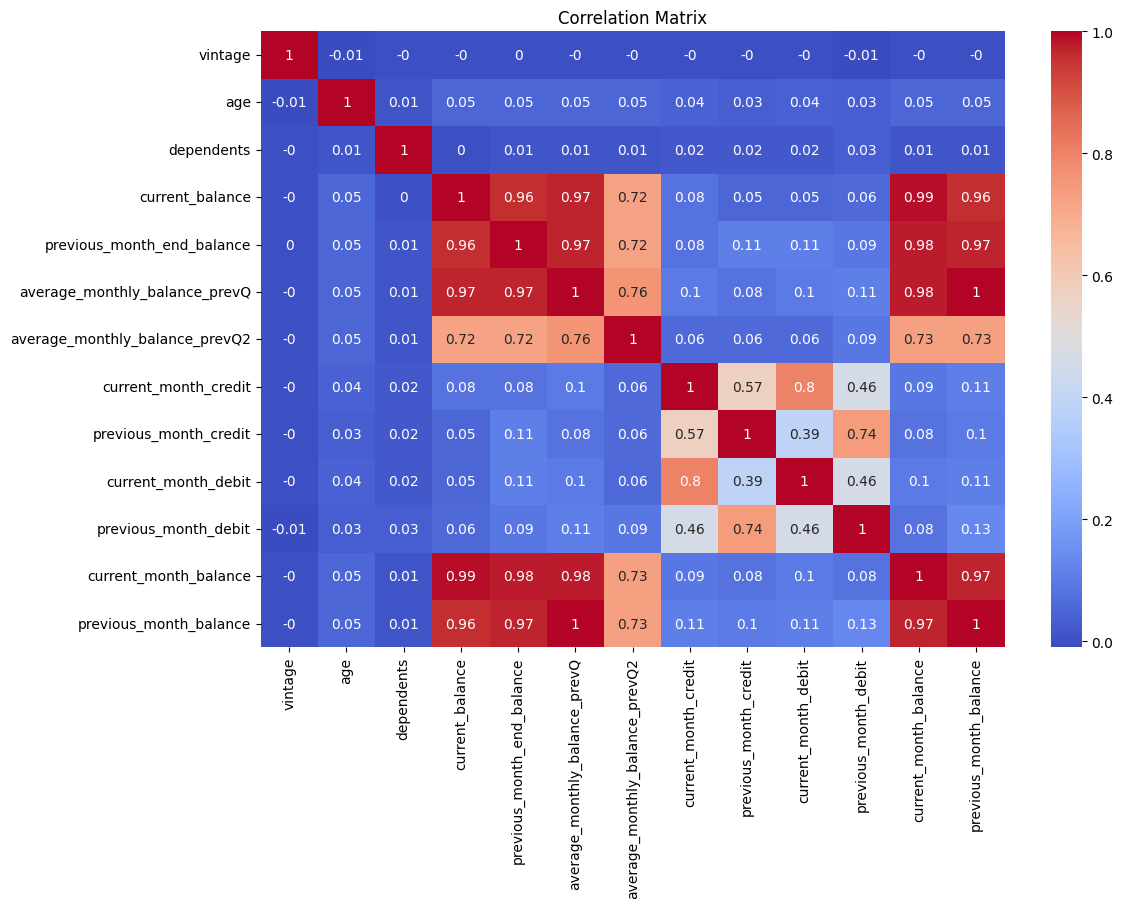

In [11]:
# Plotting the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(corr_mat, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

In [12]:
corr_mat1 = corr_mat[corr_mat.abs()>0.5]
corr_mat1

,vintage,age,dependents,current_balance,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance
vintage,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
age,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
dependents,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
current_balance,NaN,NaN,NaN,1.00,0.96,0.97,0.72,NaN,NaN,NaN,NaN,0.99,0.96
previous_month_end_balance,NaN,NaN,NaN,0.96,1.00,0.97,0.72,NaN,NaN,NaN,NaN,0.98,0.97
average_monthly_balance_prevQ,NaN,NaN,NaN,0.97,0.97,1.00,0.76,NaN,NaN,NaN,NaN,0.98,1.00
average_monthly_balance_prevQ2,NaN,NaN,NaN,0.72,0.72,0.76,1.00,NaN,NaN,NaN,NaN,0.73,0.73
current_month_credit,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.00,0.57,0.8,NaN,NaN,NaN
previous_month_credit,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.57,1.00,NaN,0.74,NaN,NaN
current_month_debit,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.80,NaN,1.0,NaN,NaN,NaN


<Axes: >

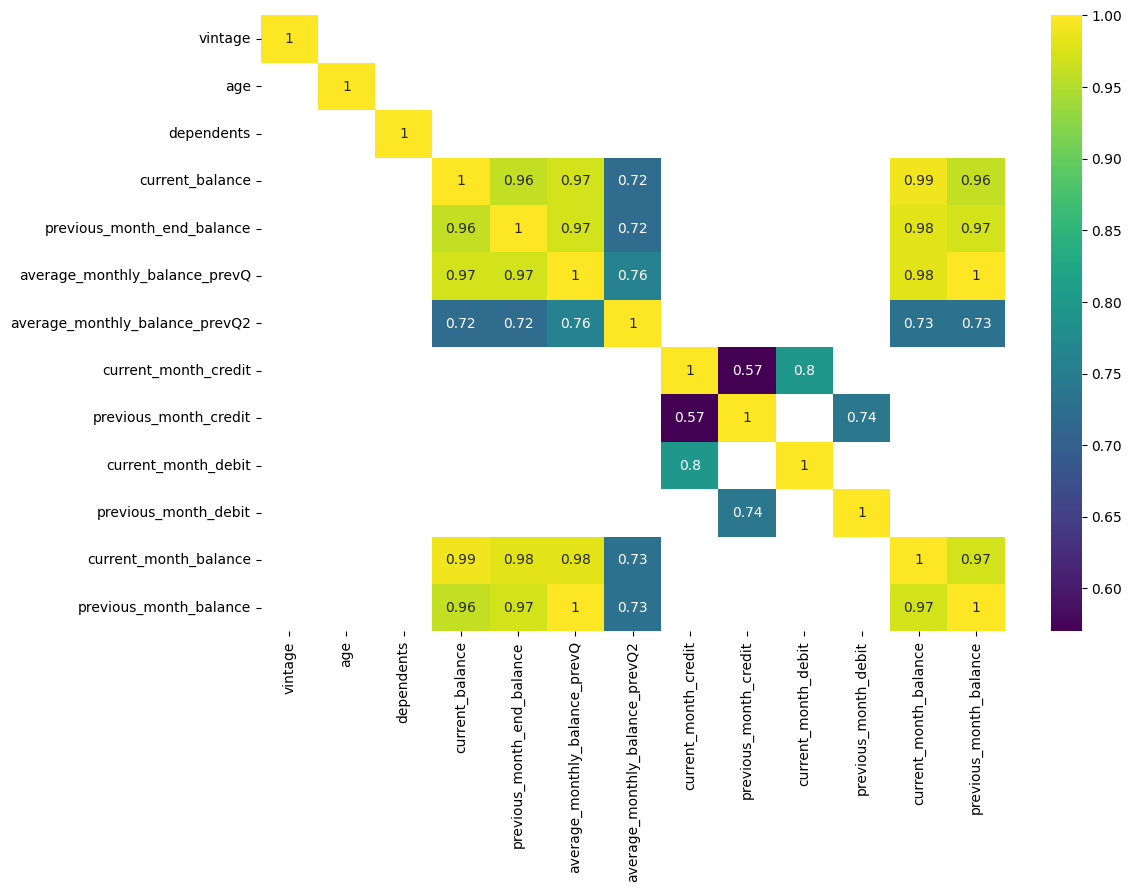

In [13]:
plt.figure(figsize=(12, 8))
sns.heatmap(corr_mat1, annot=True, cmap='viridis')

In [14]:
# Create a heatmap of the correlation matrix
corr_mat.iplot(kind='heatmap', colorscale='Blues', title='Correlation Heatmap')

In Cufflinks, a variety of colorscales are available for use in heatmaps and other plots. Some of the common colorscales include:

1. `Greys`
2. `YlGnBu`
3. `Greens`
4. `YlOrRd`
5. `Bluered`
6. `RdBu`
7. `Reds`
8. `Blues`
9. `Picnic`
10. `Rainbow`
11. `Portland`
12. `Jet`
13. `Hot`
14. `Blackbody`
15. `Earth`
16. `Electric`
17. `Viridis`
18. `Cividis`

You can experiment with these colorscales to find the one that best visualizes your data. To use a different colorscale, simply replace the `colorscale` parameter value in the `iplot` function with one of these options.

# Univariate Plots
For continous var: hist, kde, box-plots

For categorical var: bar charts, pie charts

<Axes: >

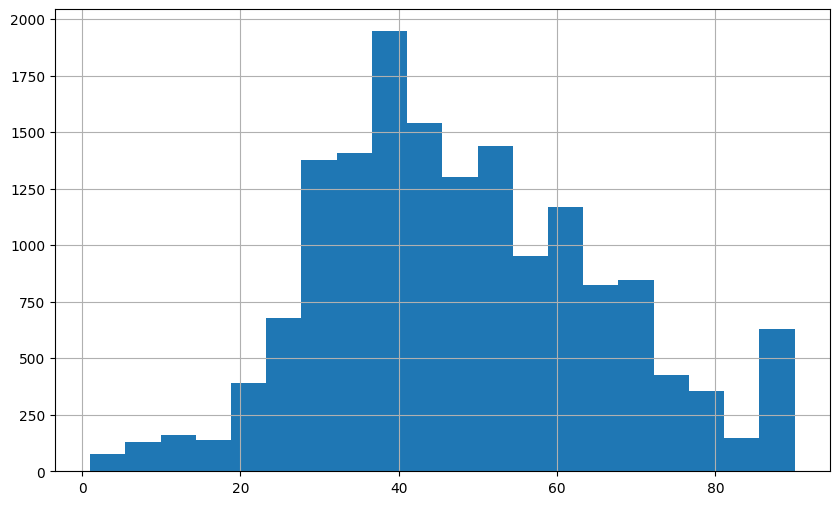

In [15]:
df['age'].hist(bins=20, figsize=(10,6))

In [16]:
import matplotlib.pyplot as plt

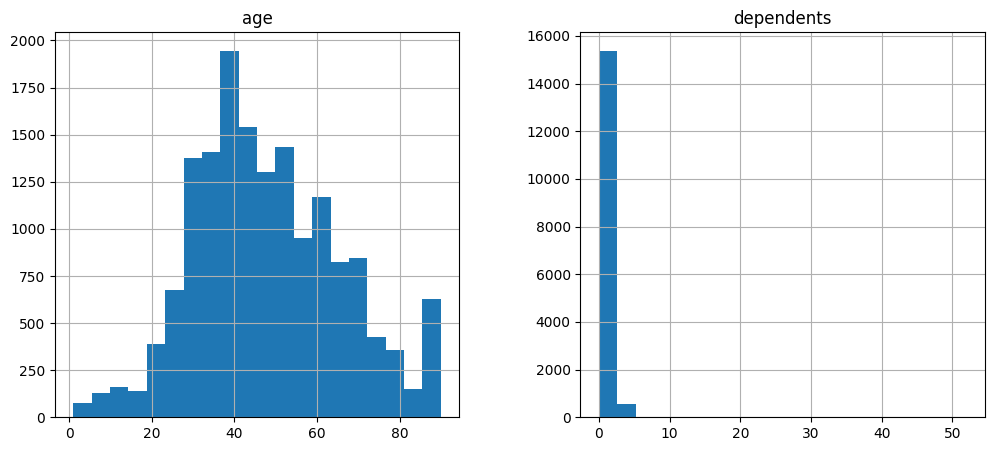

In [21]:
df[['age', 'dependents']].hist(bins=20, figsize=(12,5))
plt.show()

In [ ]:
# https://matplotlib.org/stable/gallery/style_sheets/style_sheets_reference.html

C:\Users\Prashant\AppData\Local\Temp\ipykernel_24832\1440878617.py:1: MatplotlibDeprecationWarning:

The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.



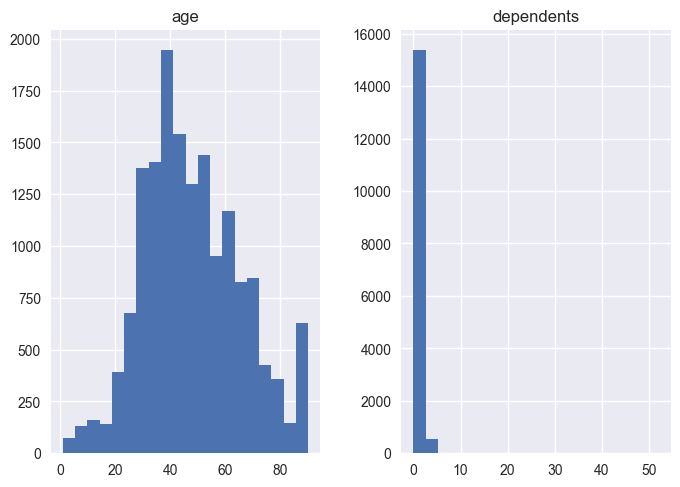

In [22]:
plt.style.use('seaborn')
df[['age', 'dependents']].hist(bins=20)
plt.show()

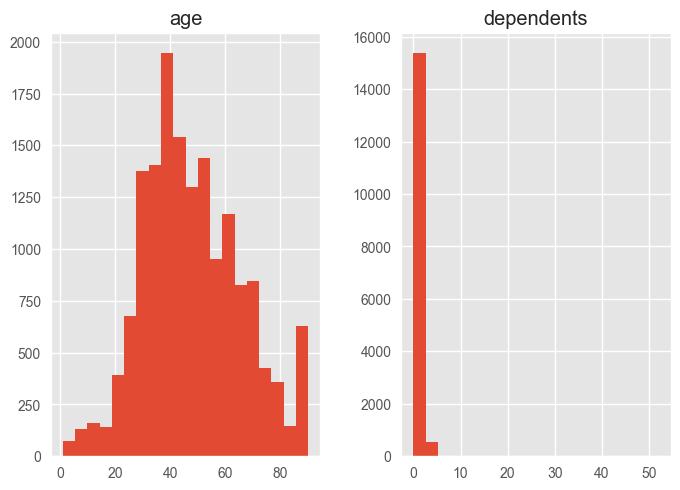

In [23]:
plt.style.use('ggplot')
df[['age', 'dependents']].hist(bins=20)
plt.show()

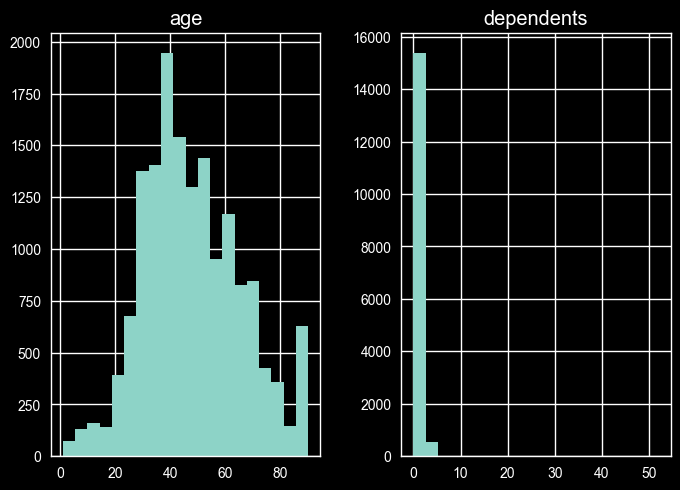

In [24]:
plt.style.use('dark_background')
df[['age', 'dependents']].hist(bins=20)
plt.show()

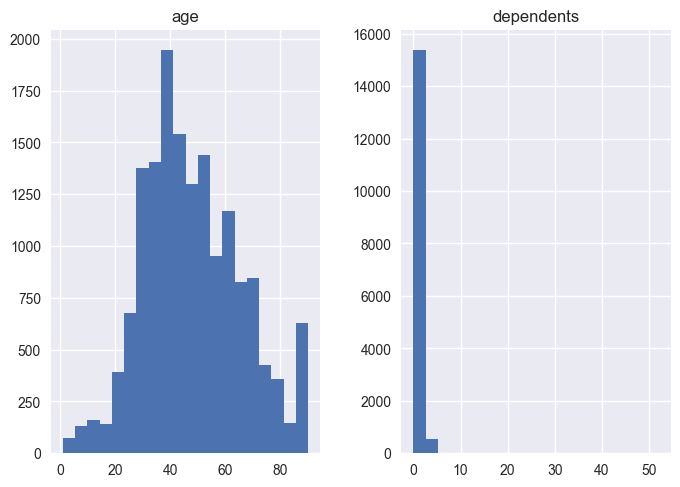

In [25]:
plt.style.use('seaborn-v0_8')
df[['age', 'dependents']].hist(bins=20)
plt.show()

<Axes: ylabel='Frequency'>

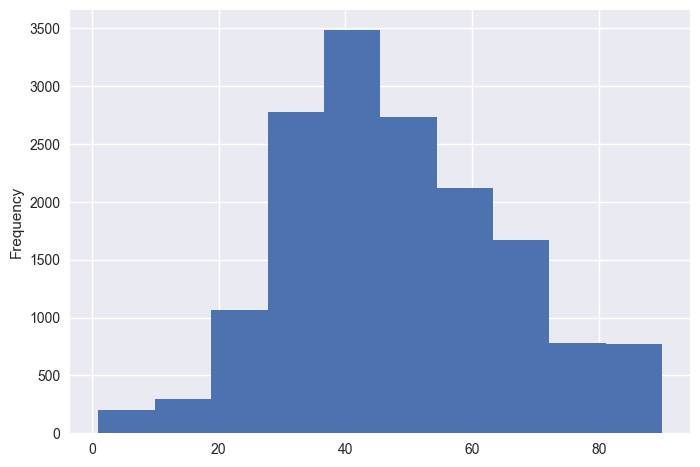

In [26]:
df['age'].plot.hist()

(-5.0, 100.0)

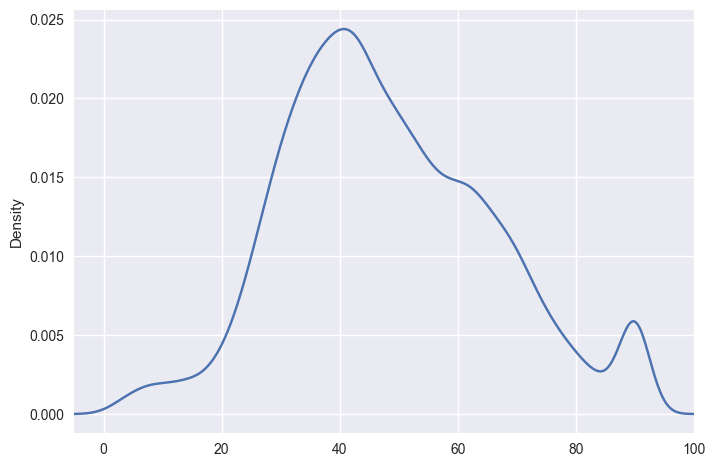

In [29]:
df['age'].plot.kde()  # Kernel Density Estimation plot from Pandas >>> Gives the shape of the histogram.
plt.xlim([-5, 100])

(-1.0, 10.0)

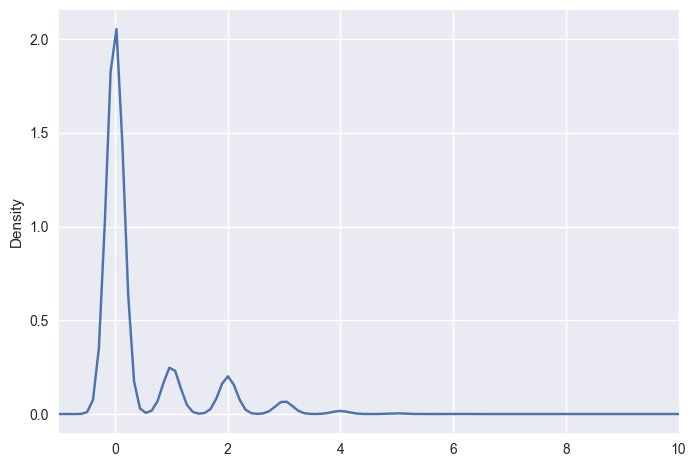

In [32]:
df['dependents'].plot.kde()
plt.xlim([-1, 10])

<Axes: xlabel='age', ylabel='Count'>

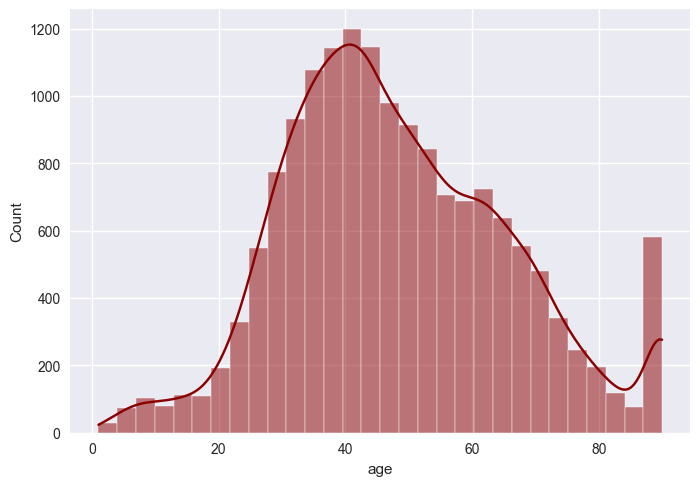

In [33]:
sns.histplot(df['age'], kde=True, color='darkred', bins=30)

Text(0.5, 1.0, 'Box Plot of Age')

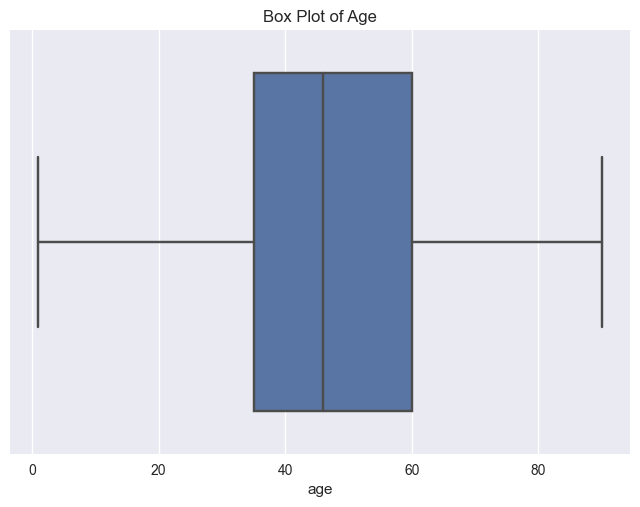

In [34]:
sns.boxplot(x=df['age'])
plt.title(f'Box Plot of Age')

Text(0.5, 1.0, 'Box Plot of Vintage')

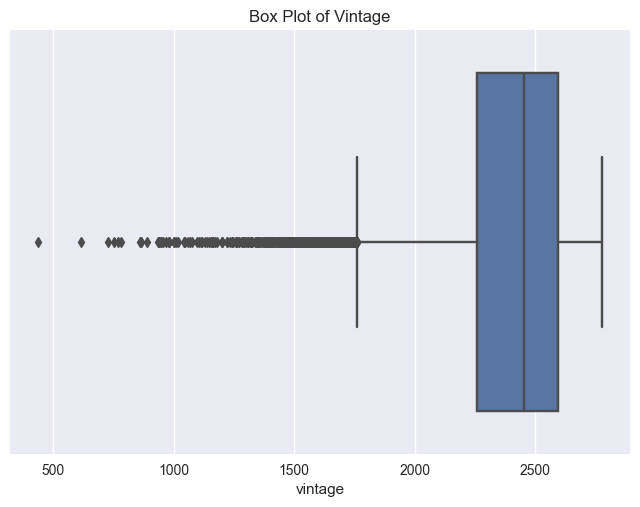

In [35]:
plt.style.use('seaborn-v0_8')
sns.boxplot(x=df['vintage'])
plt.title(f'Box Plot of Vintage')

In [36]:
# Creating a box plot with Cufflinks
df[['age']].iplot(kind='box', title='Box Plot of Age')


## Univariate Plots for Categorical Data

In [37]:
# Plotting the bar chart
occupation_counts = df['occupation'].value_counts()
occupation_counts

self_employed    9860
salaried         3745
student          1156
retired          1145
company            23
Name: occupation, dtype: int64

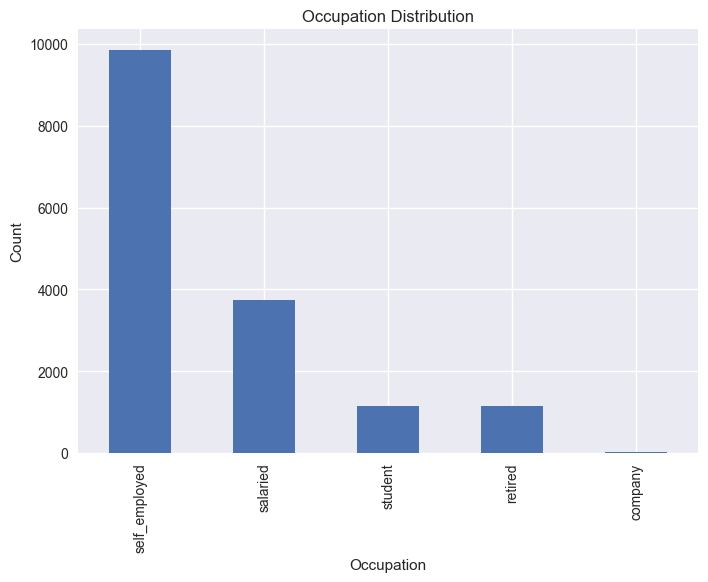

In [38]:
occupation_counts.plot(kind='bar')
plt.xlabel('Occupation')
plt.ylabel('Count')
plt.title('Occupation Distribution')
plt.show()

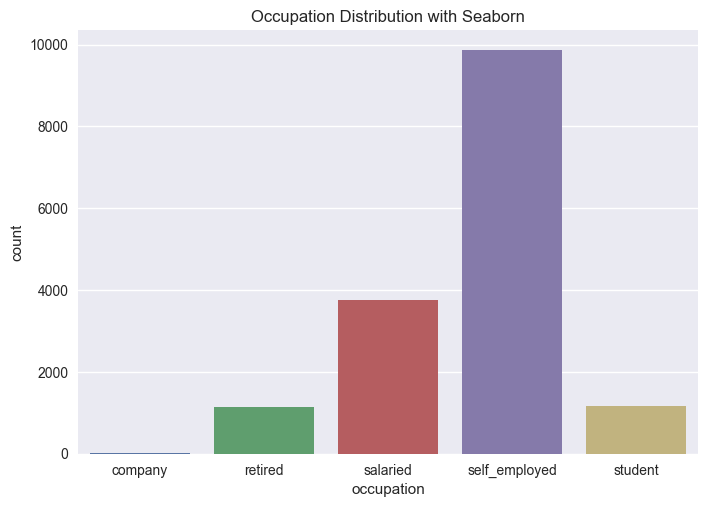

In [44]:
# Using seaborn's countplot to create a bar chart of the 'occupation' column
import seaborn as sns

sns.countplot(data=df, x='occupation')
plt.title('Occupation Distribution with Seaborn')
plt.show()

In [48]:
# Count the occurrences of each unique value in the 'occupation' column
occupation_counts = df['occupation'].value_counts().reset_index()
occupation_counts.columns = ['occupation', 'count']

# Use iplot to create the bar chart
occupation_counts.iplot(kind='bar', x='occupation', y='count', title='Occupation Count', xTitle='Occupation', yTitle='Count')

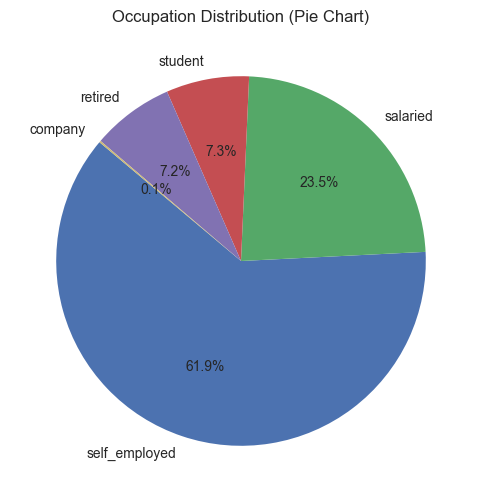

In [49]:
plt.figure(figsize=(8,6))

# Plotting a pie chart for the 'occupation' column

occupation_counts = df['occupation'].value_counts()
occupation_counts.plot(kind='pie', autopct='%1.1f%%', startangle=140)
plt.ylabel('')  # Hiding the y-label
plt.title('Occupation Distribution (Pie Chart)')
plt.show()

In [52]:
# Reset the index of the occupation_counts to convert it into a DataFrame
occupation_counts_df = occupation_counts.reset_index()
occupation_counts_df.columns = ['occupation', 'count']

# Creating a pie chart with Cufflinks
occupation_counts_df.iplot(kind='pie', labels='occupation', values='count', title='Occupation Distribution', pull=0.05)


The pull parameter slightly separates the slices of the pie chart, similar to how you might want to emphasize parts of a chart in Matplotlib.

# Further detailed visualizations

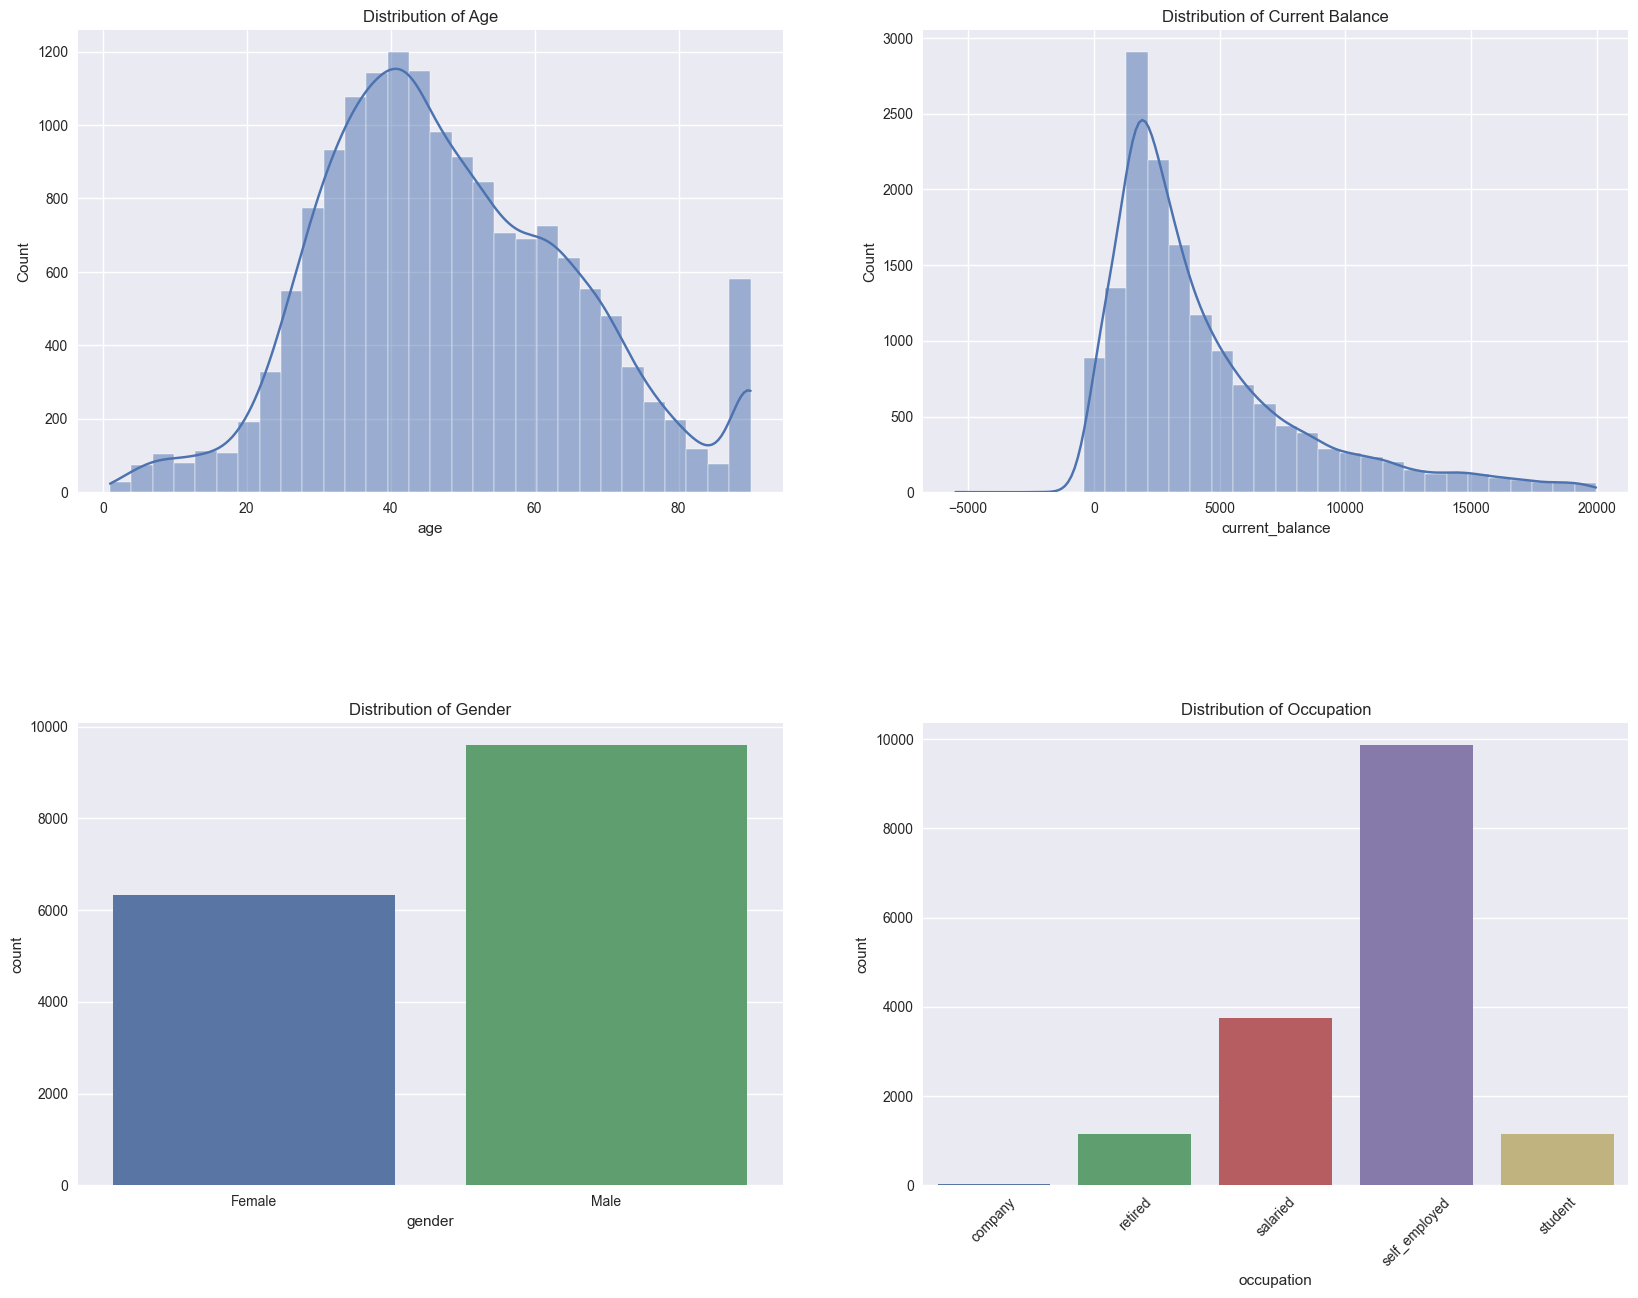

In [53]:
# Setting up the figure size and layout for multiple plots
plt.figure(figsize=(20, 15))
plt.subplots_adjust(hspace=0.5)

# Distribution of Age
plt.subplot(2, 2, 1)
sns.histplot(df['age'], bins=30, kde=True)
plt.title('Distribution of Age')

# Distribution of Current Balance
plt.subplot(2, 2, 2)
sns.histplot(df[df['current_balance'] < 20000]['current_balance'], bins=30, kde=True)  # Limiting to a smaller range for clarity
plt.title('Distribution of Current Balance')

# Distribution of Gender
plt.subplot(2, 2, 3)
sns.countplot(x='gender', data=df)
plt.title('Distribution of Gender')

# Distribution of Occupation
plt.subplot(2, 2, 4)
sns.countplot(x='occupation', data=df)
plt.xticks(rotation=45)
plt.title('Distribution of Occupation')

plt.show()

# Bivariate Plots: 2 Numeric Variables

In [58]:
# https://matplotlib.org/stable/gallery/lines_bars_and_markers/marker_reference.html

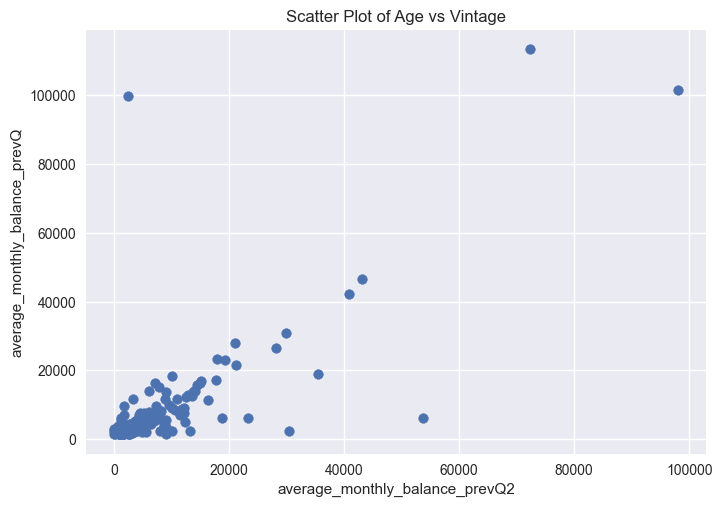

In [68]:
sample = df.sample(200)


plt.scatter(sample['average_monthly_balance_prevQ2'], sample['average_monthly_balance_prevQ'], marker='o')
plt.xlabel('average_monthly_balance_prevQ2')
plt.ylabel('average_monthly_balance_prevQ')
plt.title('Scatter Plot of Age vs Vintage')
plt.show()


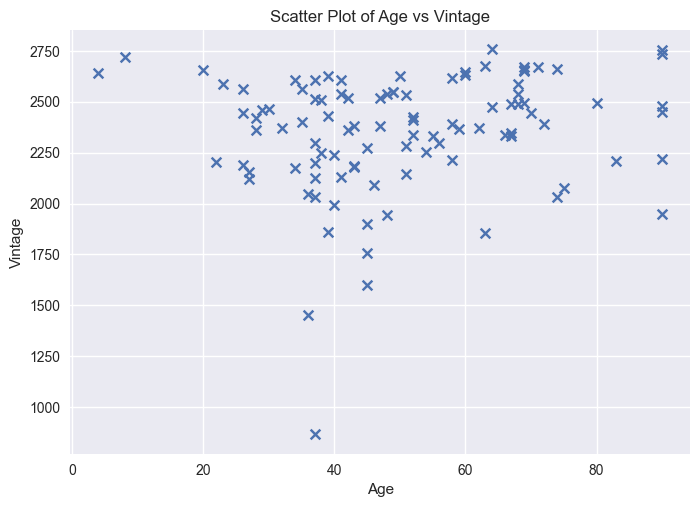

In [63]:
# Plotting the scatter plot
sample = df.sample(100)

plt.scatter(sample['age'], sample['vintage'], marker='x')
plt.xlabel('Age')
plt.ylabel('Vintage')
plt.title('Scatter Plot of Age vs Vintage')
plt.show()


In [59]:
# Creating the scatter plot
sample.iplot(kind='scatter', x='age', y='vintage', mode='markers',
         xTitle='Age', yTitle='Vintage', 
         title='Scatter Plot of Age vs Vintage')

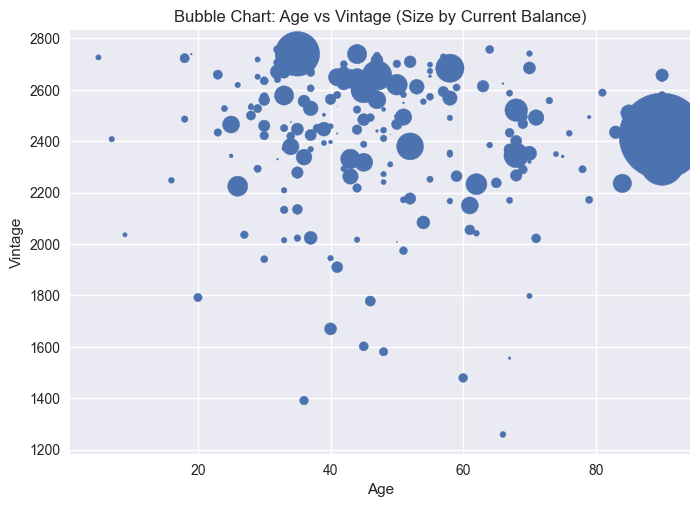

In [69]:
# Creating a bubble chart
plt.scatter(sample['age'], sample['vintage'], s=0.01*sample['current_balance'])
plt.xlabel('Age')
plt.ylabel('Vintage')
plt.title('Bubble Chart: Age vs Vintage (Size by Current Balance)')
plt.show()

In [70]:
# Creating the bubble chart
sample.iplot(kind='bubble', x='age', y='vintage', size='current_balance',
         xTitle='Age', yTitle='Vintage', 
         title='Bubble Chart: Age vs Vintage (Size by Current Balance)')

# Bivariate Plots: 1 Numeric Variable + 1 Cat. Var.

Text(0.5, 1.0, 'Age vs Churn')

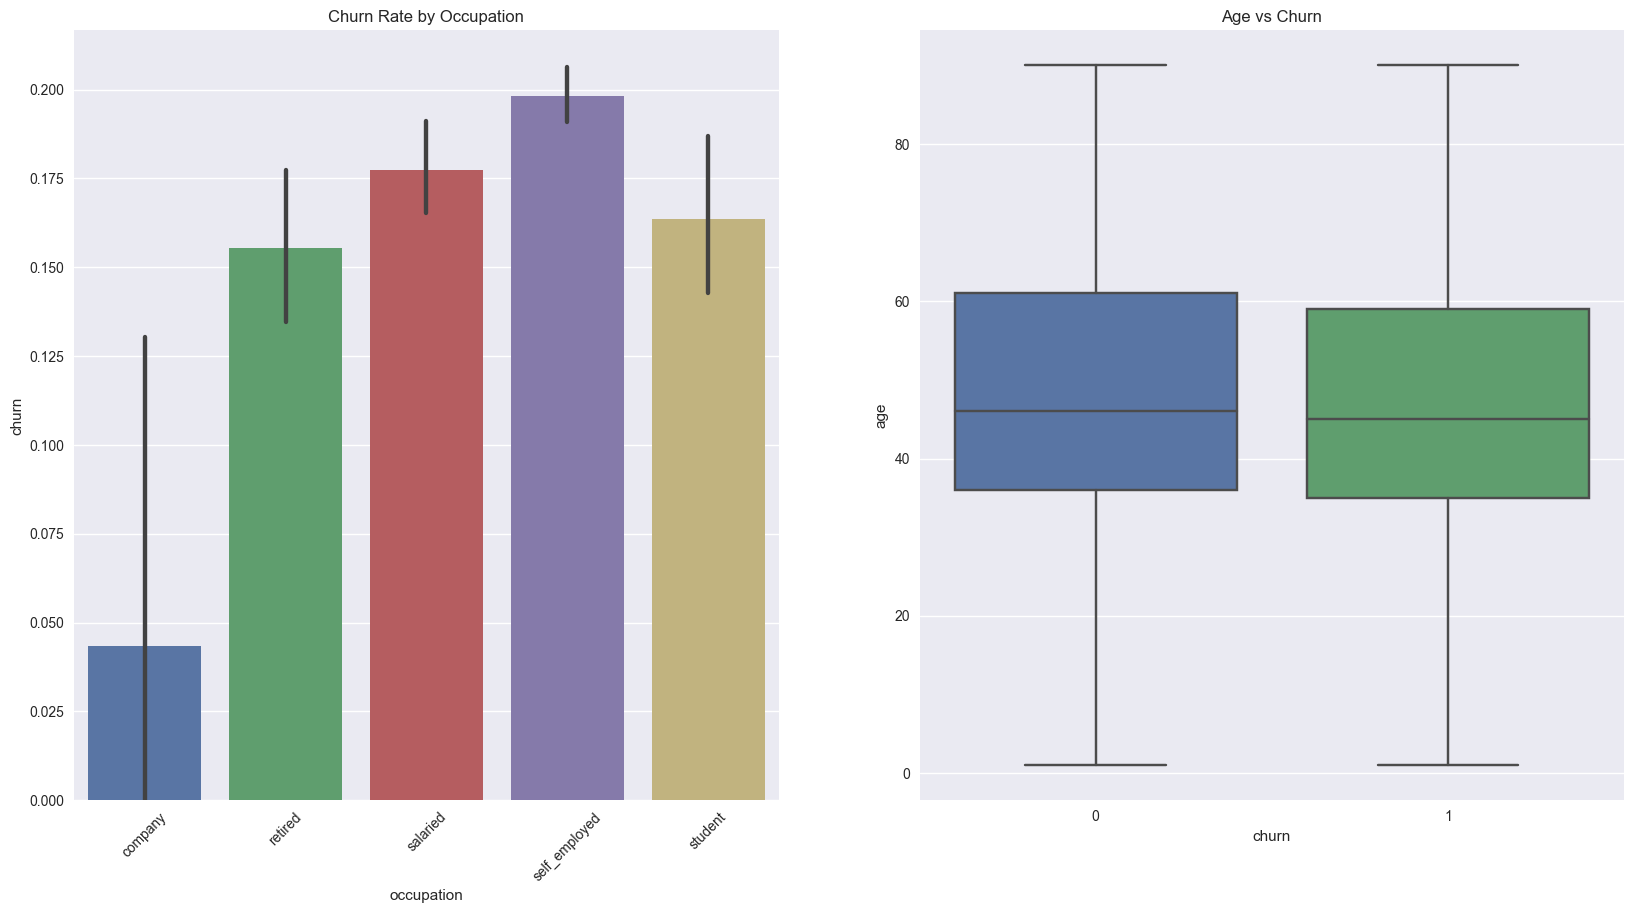

In [71]:
plt.figure(figsize=(20, 10))

# Churn Rate by Occupation
df['churn'] = df['churn'].astype("Int32")

plt.subplot(1, 2, 1)
sns.barplot(x='occupation', y='churn', data=df)
plt.xticks(rotation=45)
plt.title('Churn Rate by Occupation')

# Box Plot for Age vs Churn
plt.subplot(1, 2, 2)
sns.boxplot(x='churn', y='age', data=df)
plt.title('Age vs Churn')

### Cufflinks doesn't directly support creating subplots in the same way Matplotlib does. However, you can use Plotly's subplot feature to achieve a similar layout. 

In [72]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

# Convert 'churn' to Int32 (assuming it's not already)
df['churn'] = df['churn'].astype("Int32")

# Create a figure with 2 subplots
fig = make_subplots(rows=1, cols=2, subplot_titles=('Churn Rate by Occupation', 'Age vs Churn'))

# First plot: Bar plot for Churn Rate by Occupation
churn_rate = df.groupby('occupation')['churn'].mean().reset_index()
fig.add_trace(go.Bar(x=churn_rate['occupation'], y=churn_rate['churn']), row=1, col=1)

# Second plot: Box plot for Age vs Churn
fig.add_trace(go.Box(x=df['churn'], y=df['age']), row=1, col=2)

# Update layout
fig.update_layout(height=600, width=1200, title_text="Churn Analysis")
fig.show()


In [73]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly.express as px  # For color sequences

# Create a figure with 2 subplots
fig = make_subplots(rows=1, cols=2, subplot_titles=('Churn Rate by Occupation', 'Age vs Churn'))

# First plot: Bar plot for Churn Rate by Occupation
churn_rate = df.groupby('occupation')['churn'].mean().reset_index()
colors = px.colors.qualitative.Plotly  # Using Plotly's qualitative color palette
fig.add_trace(go.Bar(x=churn_rate['occupation'], y=churn_rate['churn'], marker_color=colors), row=1, col=1)

# Second plot: Box plot for Age vs Churn
# We'll assign different colors for each 'churn' category
for churn_category in df['churn'].unique():
    df_filtered = df[df['churn'] == churn_category]
    fig.add_trace(go.Box(y=df_filtered['age'], name=str(churn_category), marker_color=colors[churn_category % len(colors)]), row=1, col=2)

# Update layout
fig.update_layout(height=500, width=1000, title_text="Churn Analysis")
fig.show()


In [74]:
df.groupby(by="gender")["vintage"].describe().round(2)

,count,mean,std,min,25%,50%,75%,max
gender,,,,,,,,
Female,6334.0,2396.93,265.84,769.0,2263.25,2459.0,2593.0,2776.0
Male,9595.0,2389.45,276.76,438.0,2258.00,2450.0,2592.0,2776.0


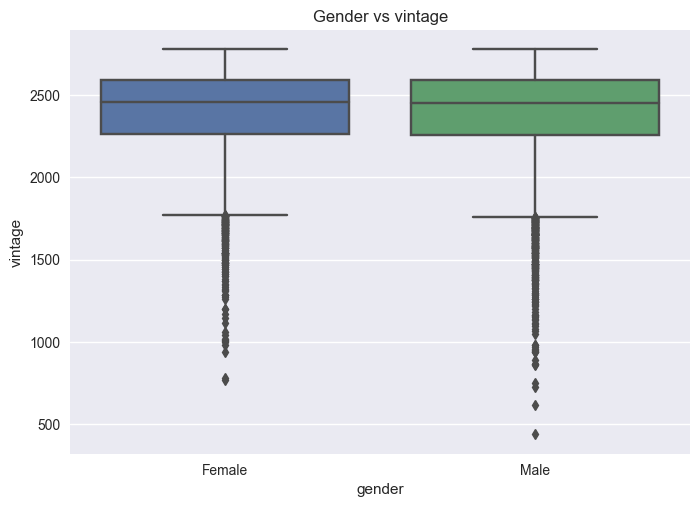

In [75]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x='gender', y='vintage', data=df)
plt.title('Gender vs vintage')
plt.show()

Box Plots: Show the distribution of the continuous variable within each category of the categorical variable. They are useful for spotting outliers and understanding the spread of the data.

Violin Plots: Similar to box plots but provide a deeper insight into the distribution of the continuous variable, showing the density distribution of the data at different values.

Bar Charts: Display the mean (or other aggregates like median) of the continuous variable for each category of the categorical variable.

Strip Plots or Swarm Plots: These plots show all data points for the continuous variable within each category of the categorical variable, giving a sense of the data density.

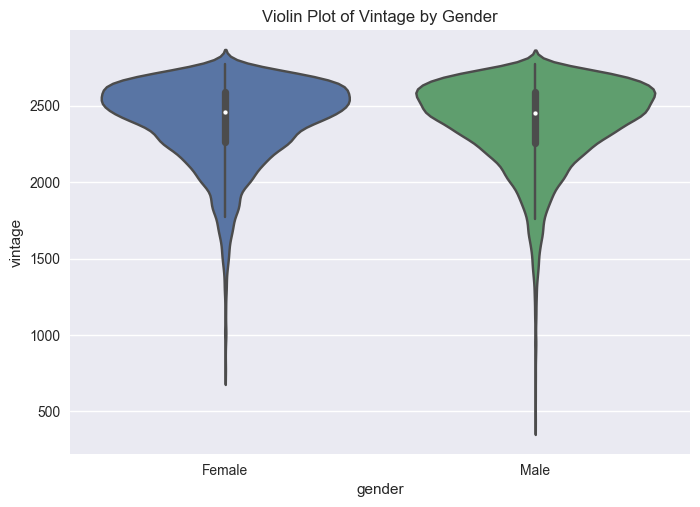

In [76]:
# Creating a violin plot using seaborn
sns.violinplot(x=df['gender'], y=df['vintage'])
plt.title('Violin Plot of Vintage by Gender')
plt.show()

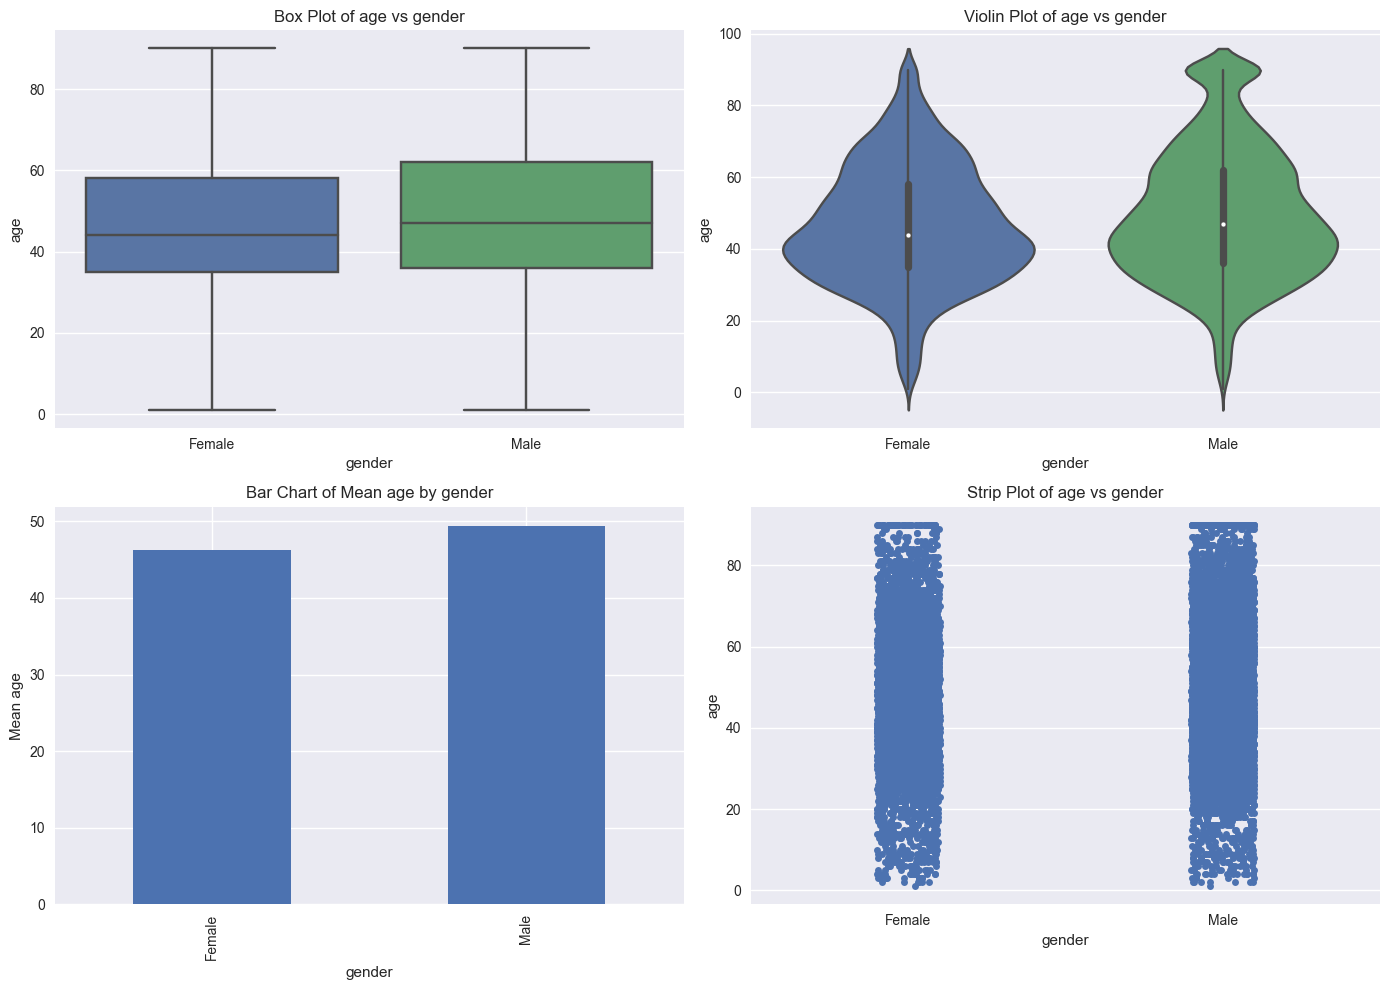

In [77]:
# Choosing a continuous and a categorical variable for demonstration
cont_var, cat_var = 'age', 'gender'

# Creating various bivariate plots

# Box Plot
plt.figure(figsize=(14, 10))
plt.subplot(2, 2, 1)
sns.boxplot(x=cat_var, y=cont_var, data=df)
plt.title(f'Box Plot of {cont_var} vs {cat_var}')

# Violin Plot
plt.subplot(2, 2, 2)
sns.violinplot(x=cat_var, y=cont_var, data=df)
plt.title(f'Violin Plot of {cont_var} vs {cat_var}')

# Bar Chart (showing mean of the continuous variable for each category)
plt.subplot(2, 2, 3)
df.groupby(cat_var)[cont_var].mean().plot(kind='bar')
plt.ylabel(f'Mean {cont_var}')
plt.title(f'Bar Chart of Mean {cont_var} by {cat_var}')

# Strip Plot
plt.subplot(2, 2, 4)
sns.stripplot(x=cat_var, y=cont_var, data=df, jitter=True)
plt.title(f'Strip Plot of {cont_var} vs {cat_var}')

plt.tight_layout()
plt.show()



# Bivariate Plots: 2 Categorical variables

In [78]:
# Contingency_table beween 2 categorical variables
pd.crosstab(df['gender'], df['occupation'])

occupation,company,retired,salaried,self_employed,student
gender,,,,,
Female,3,220,1030,4518,563
Male,20,925,2715,5342,593


In [80]:
pd.crosstab(index=df['occupation'], columns=df['gender'])

gender,Female,Male
occupation,,
company,3,20
retired,220,925
salaried,1030,2715
self_employed,4518,5342
student,563,593


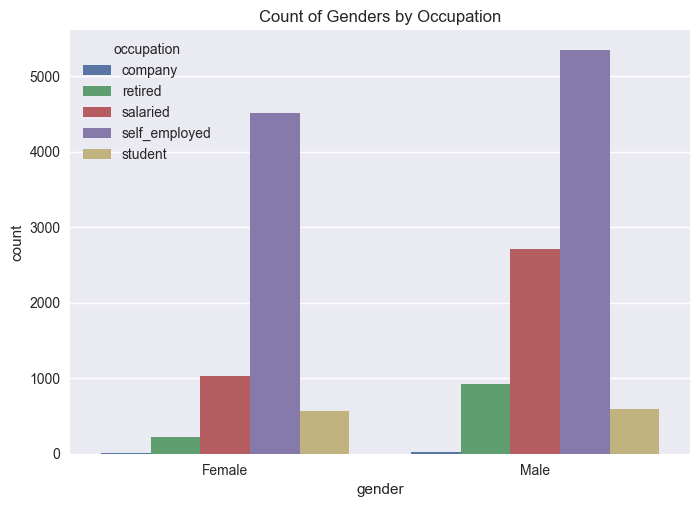

In [81]:
# Creating a countplot with hue for occupation
sns.countplot(x=df['gender'],hue=df['occupation'])
plt.title('Count of Genders by Occupation')
plt.show()

<Axes: xlabel='gender', ylabel='count'>

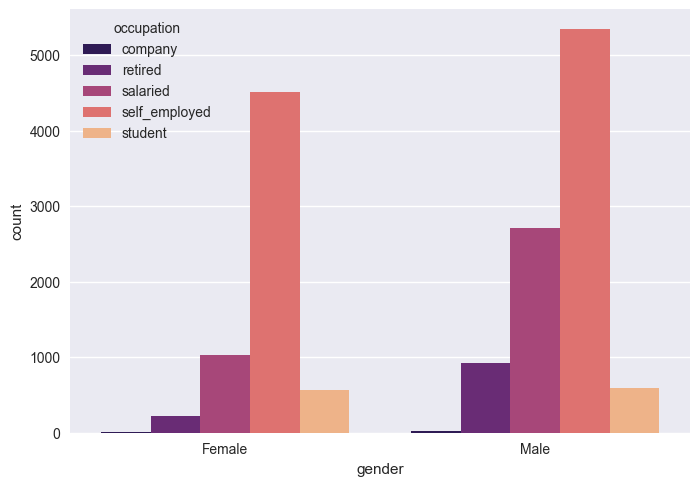

In [82]:
sns.countplot(x='gender', hue='occupation', data=df, palette='magma')

In [83]:
pd.crosstab(index=df['churn'], columns=df['gender'])

gender,Female,Male
churn,,
0,5208,7734
1,1126,1861


<Axes: xlabel='churn', ylabel='count'>

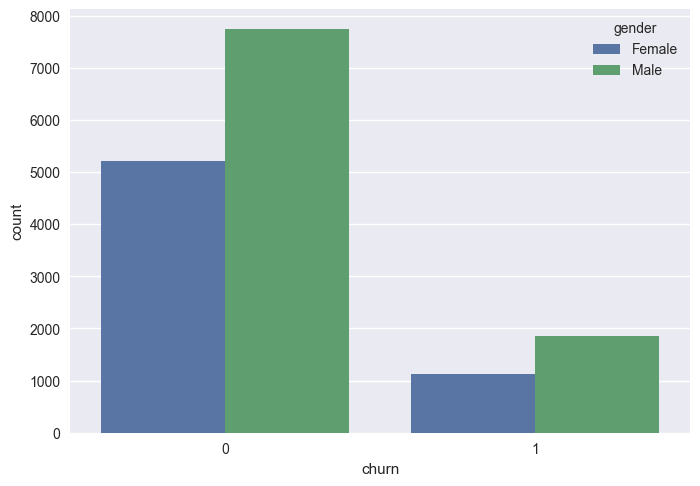

In [84]:
sns.countplot(x='churn', hue='gender', data=df)

In [88]:
# Calculate the average current_balance for each gender and occupation combination
average_balance = df.groupby(['gender', 'occupation']).mean(numeric_only=True).reset_index()
average_balance

,gender,occupation,vintage,age,dependents,current_balance,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn
0,Female,company,2102.000000,45.333333,0.000000,3920.570000,7252.133333,5572.700000,4824.086667,143.160000,2619.346667,3474.723333,0.300000,4662.813333,7037.083333,0.333333
1,Female,retired,2381.172727,71.786364,0.059091,8528.989545,9451.870227,7896.080455,6327.859136,2553.502682,4329.330818,2781.452818,1709.100909,8791.701773,8270.855773,0.127273
2,Female,salaried,2389.182524,41.491262,0.154369,6703.122583,6741.694728,6695.843087,6390.801631,1876.335010,2064.358214,1900.309117,2656.508058,6548.922350,6762.056612,0.163107
3,Female,self_employed,2400.376715,49.546702,0.123506,6692.574241,6740.108853,6964.274668,6166.738617,2740.843477,2285.946144,3074.981490,2655.932795,6666.186259,6954.300821,0.186366
4,Female,student,2391.149201,19.090586,0.012433,4305.179236,4406.522451,4436.754103,4085.429734,1044.931083,977.965044,1324.851208,1200.126359,4414.842966,4487.790515,0.154529
5,Male,company,2394.750000,72.650000,0.400000,7874.087000,4870.325500,5224.650500,3389.979000,4217.837000,4132.604000,2081.957500,947.872000,5889.764500,5150.865000,0.0
6,Male,retired,2378.124324,72.487568,0.193514,6039.143059,5924.387243,6071.070757,5756.207232,1562.275632,2319.761784,1969.855092,2536.595276,5964.422303,5966.752670,0.162162
7,Male,salaried,2397.337385,45.006630,0.538490,7080.190589,7348.304184,7200.171610,7002.286497,2787.681838,3449.761510,3139.163381,3641.271901,7138.344052,7271.656807,0.182689
8,Male,self_employed,2385.658555,50.915200,0.649944,8720.581526,8863.783117,8930.516196,9246.957025,5105.488308,5305.138214,5176.672610,4967.877739,9011.869558,8908.496601,0.208349
9,Male,student,2404.919056,19.224283,0.153457,4739.007386,4722.288921,4736.710995,4163.574081,674.112597,965.661855,788.561889,1073.295042,4763.471771,4698.666745,0.172007


In [ ]:
df['']

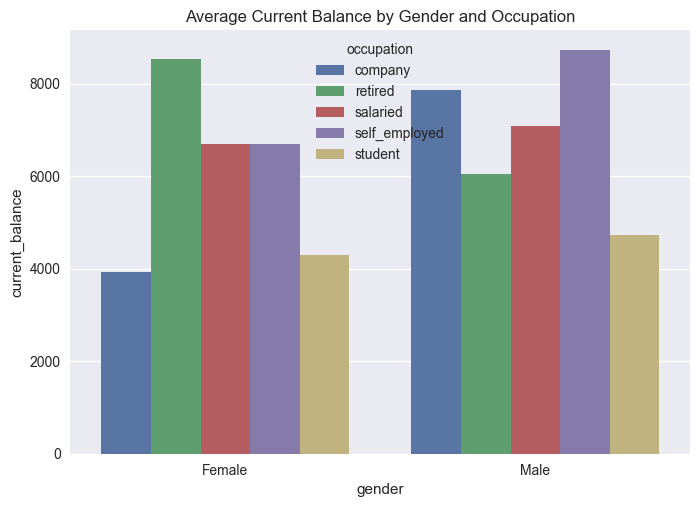

In [89]:
# Creating a bar plot
sns.barplot(x='gender', y='current_balance', hue='occupation', data=average_balance)
plt.title('Average Current Balance by Gender and Occupation')
plt.show()

# Other Bivariate plots for 2 Cat. Var.

For bivariate analysis of two categorical variables, we can use plots like stacked bar charts, grouped bar charts, or heatmaps. These types of plots help to visualize the relationship and interaction between two categorical variables.

- Stacked Bar Chart: Shows the distribution of one categorical variable within the levels of another categorical variable.
- Grouped Bar Chart: Displays the counts or proportions of one categorical variable grouped by the levels of another categorical variable.
- Heatmap of a Contingency Table: Visualizes the counts or proportions of the combinations of two categorical variables.

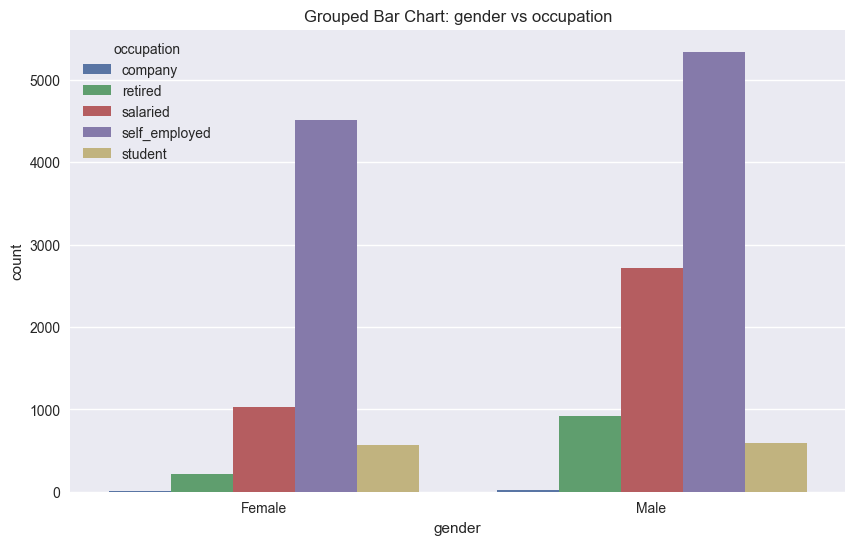

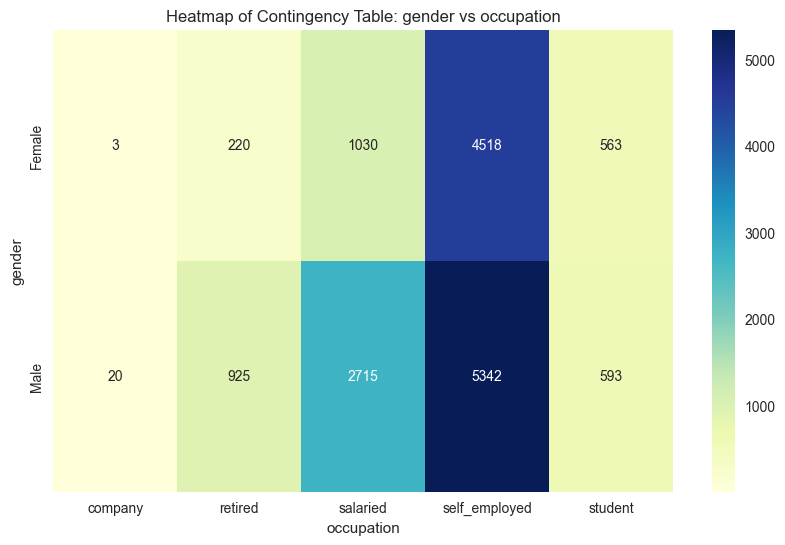

In [90]:
# Selecting two categorical variables for demonstration
cat_var1, cat_var2 = 'gender', 'occupation'

# Creating a grouped bar chart
plt.figure(figsize=(10, 6))
sns.countplot(x=cat_var1, hue=cat_var2, data=df)
plt.title(f'Grouped Bar Chart: {cat_var1} vs {cat_var2}')
plt.show()

# Creating a heatmap of a contingency table
contingency_table = pd.crosstab(df[cat_var1], df[cat_var2])
plt.figure(figsize=(10, 6))
sns.heatmap(contingency_table, annot=True, cmap="YlGnBu", fmt='g')
plt.title(f'Heatmap of Contingency Table: {cat_var1} vs {cat_var2}')
plt.show()



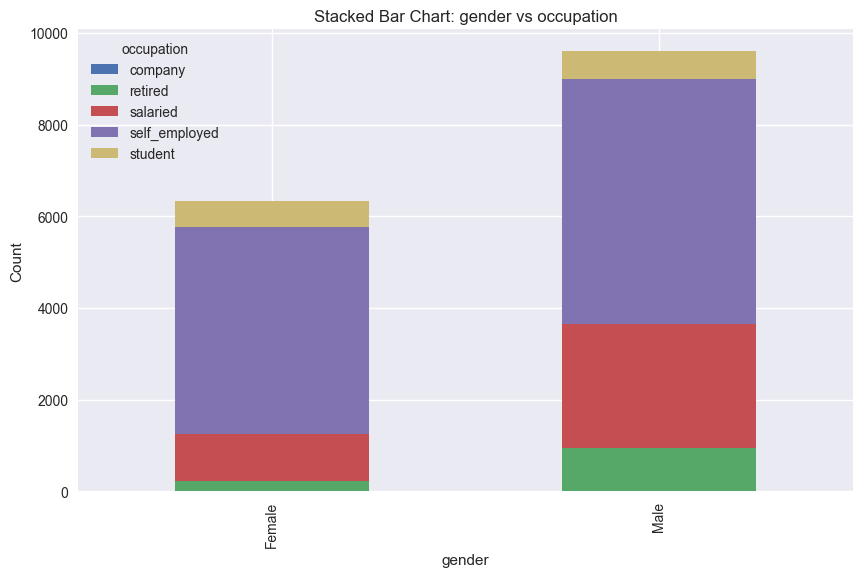

In [91]:
# Creating a stacked bar chart for gender and occupation
stacked_bar_data = pd.crosstab(df[cat_var1], df[cat_var2])

# Plotting the stacked bar chart
stacked_bar_data.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title(f'Stacked Bar Chart: {cat_var1} vs {cat_var2}')
plt.xlabel(cat_var1)
plt.ylabel('Count')
plt.show()



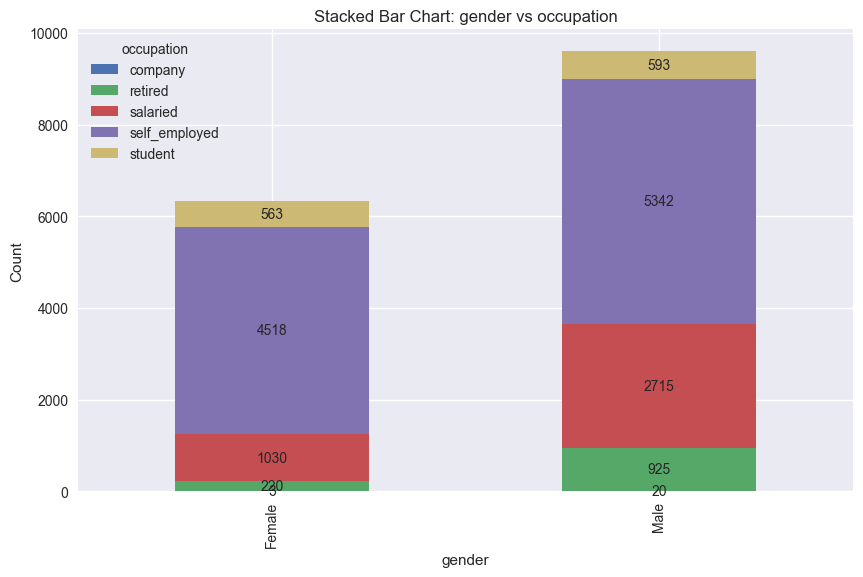

In [95]:
cat_var1 = "gender"
cat_var2 = "occupation"

# Assuming df, cat_var1, and cat_var2 are already defined
stacked_bar_data = pd.crosstab(df[cat_var1], df[cat_var2])

# Plotting the stacked bar chart
ax = stacked_bar_data.plot(kind='bar', stacked=True, figsize=(10, 6))

plt.title(f'Stacked Bar Chart: {cat_var1} vs {cat_var2}')
plt.xlabel(cat_var1)
plt.ylabel('Count')

# Adding count annotations to each bar
for bar in ax.patches:
    # Calculating the height and position for the annotation
    height = bar.get_height()
    x = bar.get_x() + bar.get_width() / 2

    # If height is non-zero, place the annotation
    if height > 0:
        ax.text(x, bar.get_y() + height / 2, f'{int(height)}', ha='center', va='center')

plt.show()


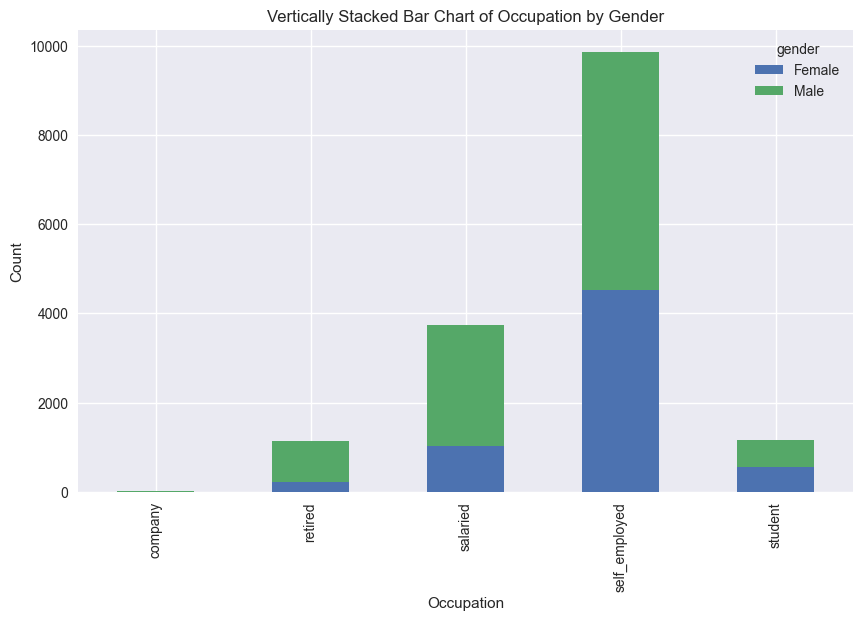

In [92]:
# Data preparation for stacked bar charts
stacked_data = pd.crosstab(df['occupation'], df['gender'])

# Vertically Stacked Bar Chart
stacked_data.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Vertically Stacked Bar Chart of Occupation by Gender')
plt.ylabel('Count')
plt.xlabel('Occupation')
plt.show()

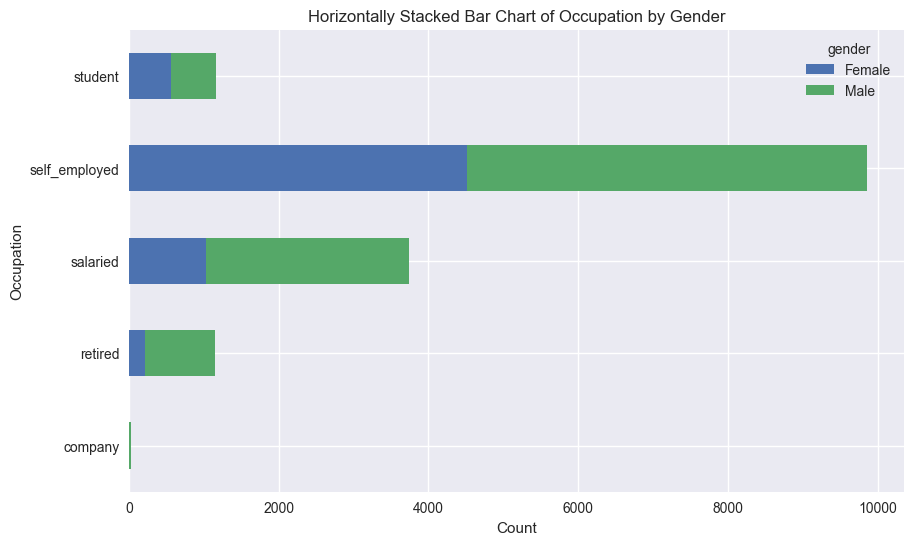

In [93]:
# Horizontally Stacked Bar Chart
stacked_data.plot(kind='barh', stacked=True, figsize=(10, 6))
plt.title('Horizontally Stacked Bar Chart of Occupation by Gender')
plt.xlabel('Count')
plt.ylabel('Occupation')
plt.show()

# MULTIVARIATE 
# 1 Cont. Var + 2 Cat. Var
Creating plots with one continuous variable and two categorical variables can provide insights into how the continuous variable's distribution varies across different categories and sub-categories. Here are a few types of plots that are useful in this context:

- **Facet Grid**: A grid of plots based on the values of the two categorical variables, showing the distribution of the continuous variable in each subset.

- **Box Plot with Hue**: A box plot that shows the distribution of the continuous variable for one categorical variable, with different colors (hue) representing the second categorical variable.

- **Violin Plot with Hue**: Similar to the box plot but provides a richer representation of the continuous variable's distribution, with the hue representing the second categorical variable.

- **Bar Plot with Hue**: Shows the mean (or other aggregate measures) of the continuous variable for each category of the first categorical variable, with different colors representing the second categorical variable.

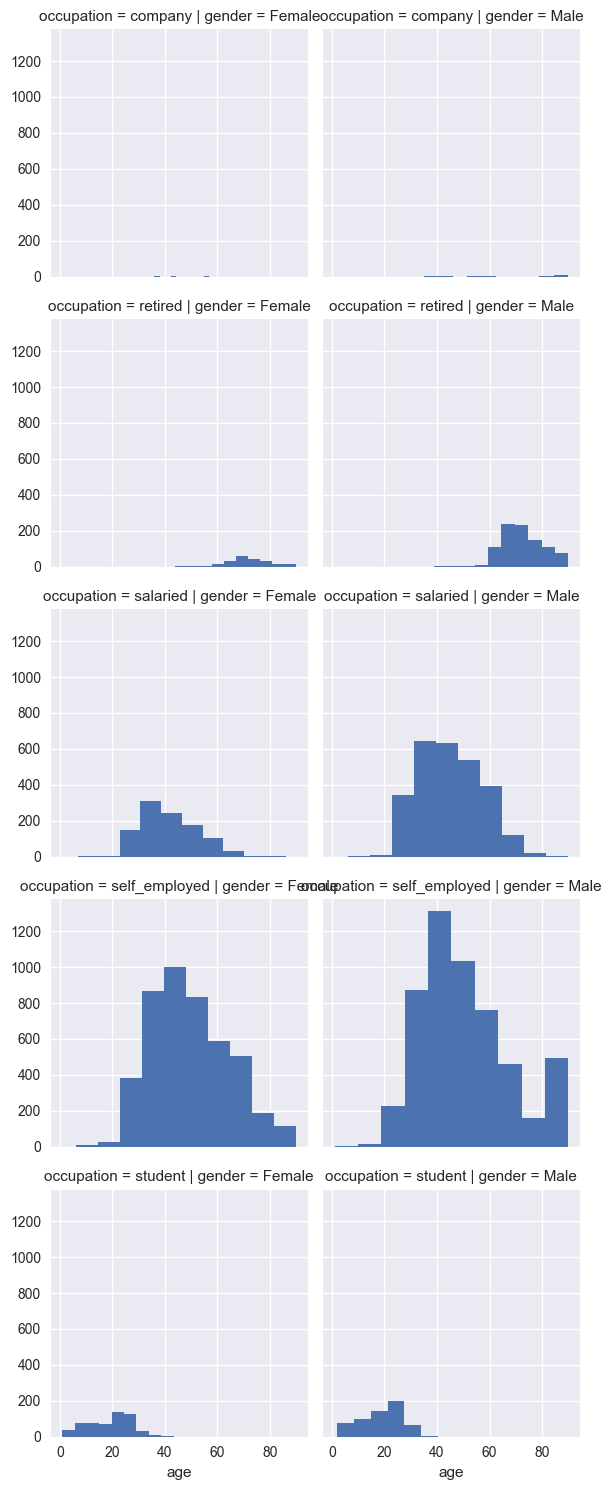

In [96]:
# Continuous and categorical variables for demonstration
cont_variable = 'age'
cat_variable1 = 'gender'
cat_variable2 = 'occupation'

# Facet Grid
g = sns.FacetGrid(df, col=cat_variable1, row=cat_variable2)
g = g.map(plt.hist, cont_variable)

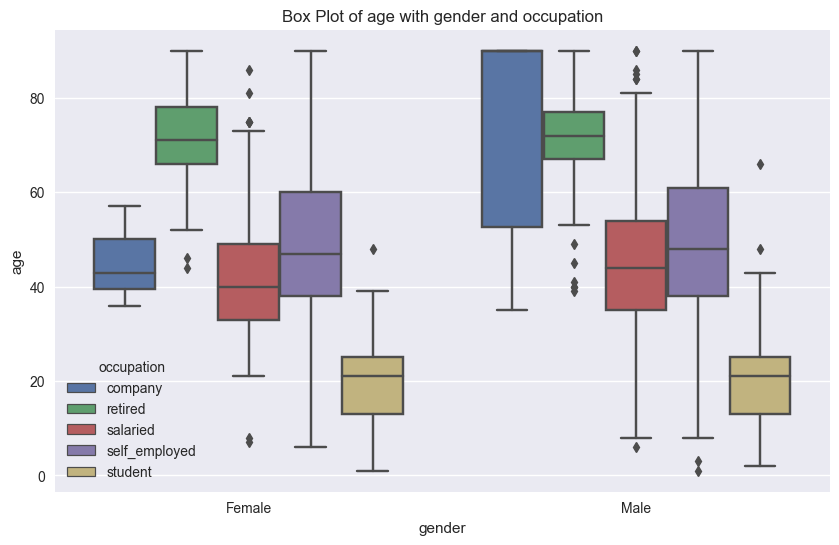

In [97]:
# Box Plot with Hue
plt.figure(figsize=(10, 6))
sns.boxplot(x=cat_variable1, y=cont_variable, hue=cat_variable2, data=df)
plt.title(f'Box Plot of {cont_variable} with {cat_variable1} and {cat_variable2}')
plt.show()

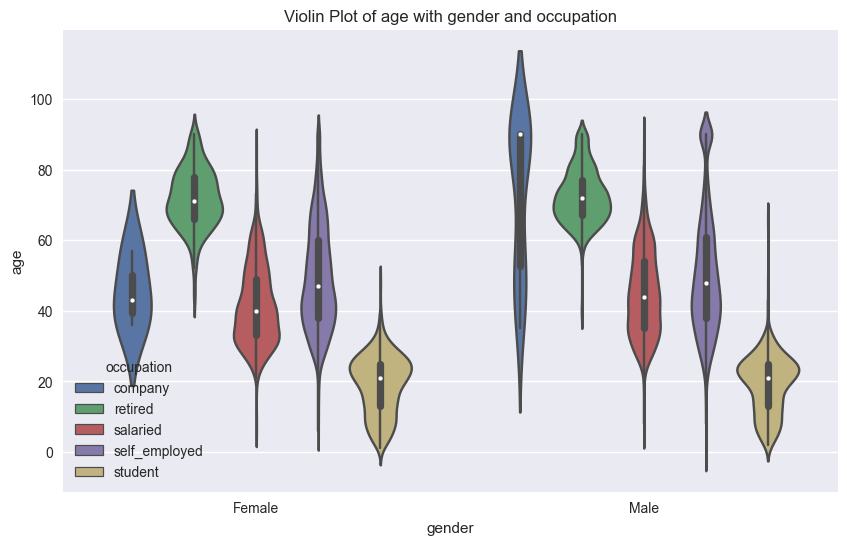

In [98]:
# Violin Plot with Hue
plt.figure(figsize=(10, 6))
sns.violinplot(x=cat_variable1, y=cont_variable, hue=cat_variable2, data=df, split=False)
plt.title(f'Violin Plot of {cont_variable} with {cat_variable1} and {cat_variable2}')
plt.show()

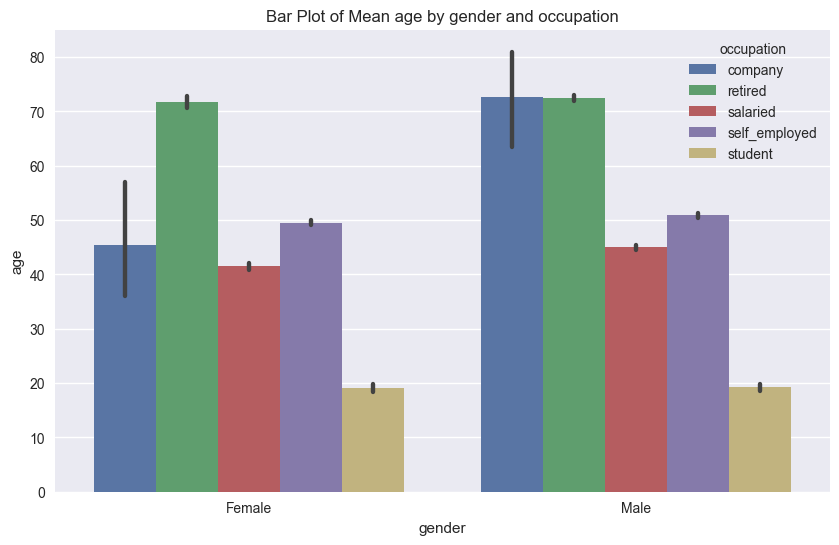

In [99]:
# Bar Plot with Hue (showing mean of the continuous variable)
plt.figure(figsize=(10, 6))
sns.barplot(x=cat_variable1, y=cont_variable, hue=cat_variable2, data=df)
plt.title(f'Bar Plot of Mean {cont_variable} by {cat_variable1} and {cat_variable2}')
plt.show()

# 1 CAt. Var. + 2 Cont. Var

When creating plots with one categorical variable and two continuous variables, we typically focus on visualizing how the continuous variables relate to each other within each category of the categorical variable. Here are a few types of plots that are useful for this kind of analysis:

- Scatter Plot with Hue: Shows the relationship between the two continuous variables, with different colors (hue) representing different categories of the categorical variable.

- Pair Plot with Hue: Similar to the scatter plot but also includes histograms for each continuous variable, colored by the categorical variable.

- Facet Grid: Creates a grid of scatter plots, one for each category of the categorical variable, showing the relationship between the two continuous variables in each category.

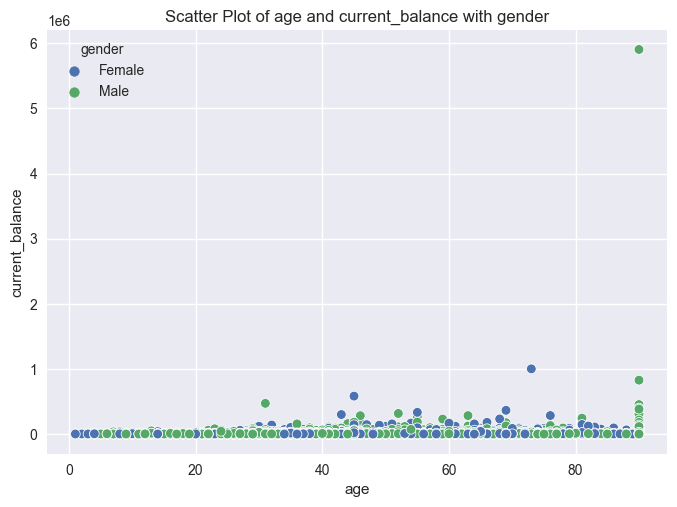

In [100]:
# Categorical and continuous variables for demonstration
cat_variable = 'gender'
cont_variable1 = 'age'
cont_variable2 = 'current_balance'

# Scatter Plot with Hue
# plt.figure(figsize=(10, 6))
sns.scatterplot(x=cont_variable1, y=cont_variable2, hue=cat_variable, data=df)
plt.title(f'Scatter Plot of {cont_variable1} and {cont_variable2} with {cat_variable}')
plt.show()

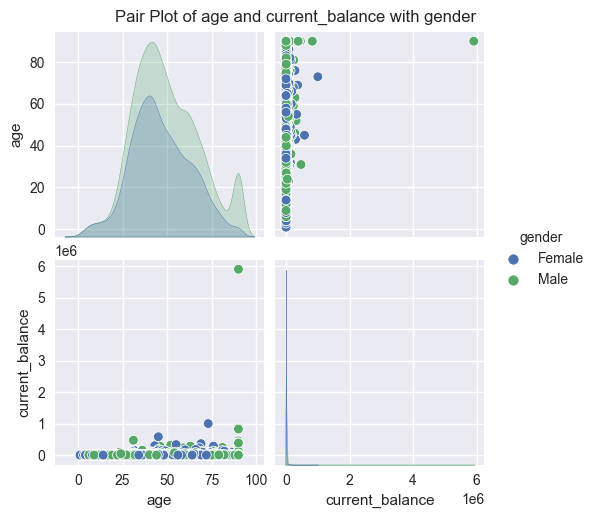

In [101]:
# Pair Plot with Hue
# plt.figure(figsize=(10, 6))
sns.pairplot(df[[cont_variable1, cont_variable2, cat_variable]], hue=cat_variable)
plt.suptitle(f'Pair Plot of {cont_variable1} and {cont_variable2} with {cat_variable}', y=1.02)
plt.show()

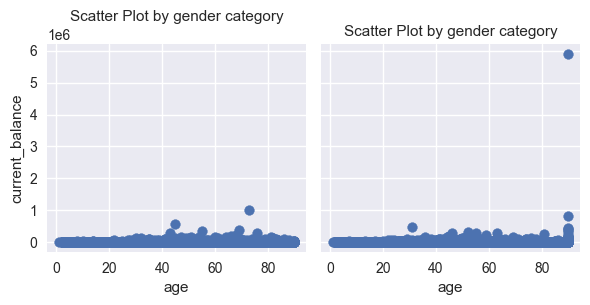

In [102]:
# Facet Grid
# plt.figure(figsize=(15, 10))
g = sns.FacetGrid(df, col=cat_variable)
g = g.map(plt.scatter, cont_variable1, cont_variable2)
g.set_titles(f'Scatter Plot by {cat_variable} category')
plt.show()

# Multivariate: 2 Cat. Var + 2 Cont. Var

There are several types of plots that can effectively represent such relationships:

- Facet Grid: Creates a grid of plots based on the categories of the two categorical variables, showing scatter plots or other relationships between the two continuous variables in each subplot.

- Pair Plot with Hue and Col: Similar to the standard pair plot but uses one categorical variable for color (hue) and another for the columns of the grid, displaying relationships between continuous variables for each combination of categorical variables.

- 3D Scatter Plot with Categorical Coloring: If you're looking to visualize all four variables in a single plot, a 3D scatter plot can be used, with the two continuous variables on the x, y, and z axes, and points colored by one of the categorical variables. However, interpreting 3D plots can be challenging.

- Violin or Box Plot with Facets: You can use violin or box plots for one continuous variable across the categories of one categorical variable, faceted by the second categorical variable, and colored by the other categorical variable.

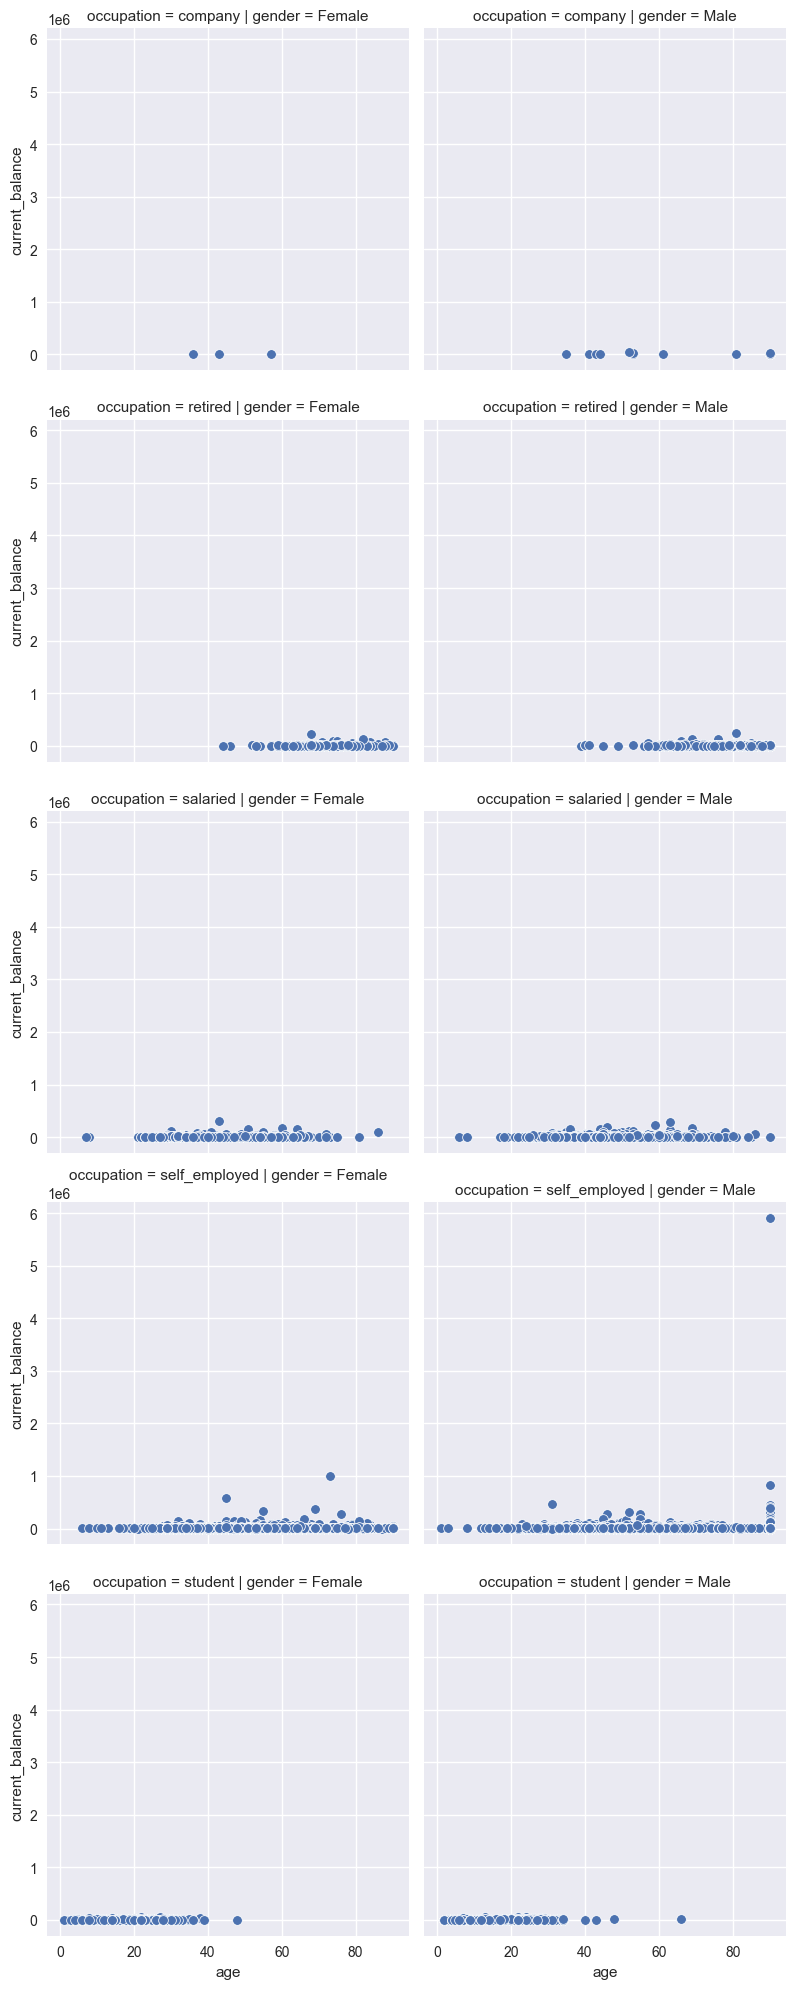

In [103]:
# Defining the variables for demonstration
cat_var1, cat_var2 = 'gender', 'occupation'
cont_var1, cont_var2 = 'age', 'current_balance'

# Facet Grid with Scatter Plot
g = sns.FacetGrid(df, col=cat_var1, row=cat_var2, height=4, aspect=1)
g = g.map(sns.scatterplot, cont_var1, cont_var2)
g.add_legend()
plt.show()

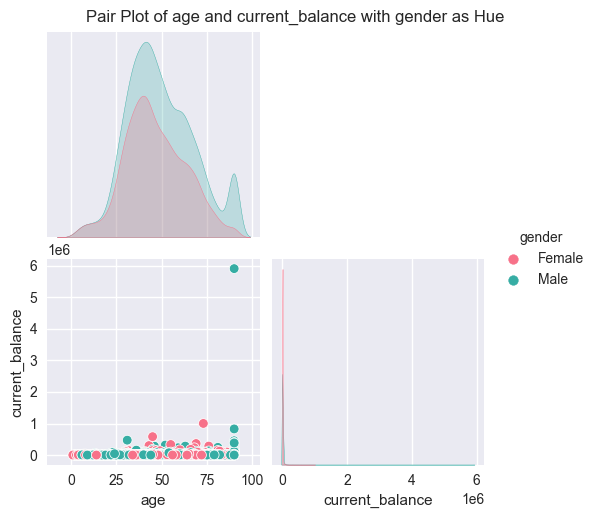

In [104]:
# Pair Plot with Hue and Col
sns.pairplot(df, hue=cat_var1, vars=[cont_var1, cont_var2], palette="husl", corner=True)
plt.suptitle(f'Pair Plot of {cont_var1} and {cont_var2} with {cat_var1} as Hue', y=1.02)
plt.show()

# Data Viz. after Transformations

In [105]:
df['vintage'].skew()

-1.4197175931628572

In [107]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

SC = StandardScaler()  # stnadardize the data to zero means, and unit standard deviation
df['vintage_std'] = SC.fit_transform(df[['vintage']])

minmax = MinMaxScaler() # rescale the data such that the min value is now 0, and max value is 1
df['vintage_minmax'] = minmax.fit_transform(df[['vintage']])

In [108]:
df[['vintage', 'vintage_std', 'vintage_minmax']]

,vintage,vintage_std,vintage_minmax
0,2401,0.031484,0.839607
1,2648,0.937978,0.945252
2,2494,0.372796,0.879384
3,2629,0.868248,0.937126
4,1879,-1.884263,0.616339
...,...,...,...
15924,2175,-0.797939,0.742943
15925,2500,0.394816,0.881950
15926,2470,0.284715,0.869119
15927,2537,0.530606,0.897776


In [111]:
from sklearn.preprocessing import PowerTransformer
boxcox = PowerTransformer(method='box-cox')  # use 'yeo-johnson' if your data contains both negative and zero values too.
df['vintage_boxcox'] = boxcox.fit_transform(df[['vintage']])

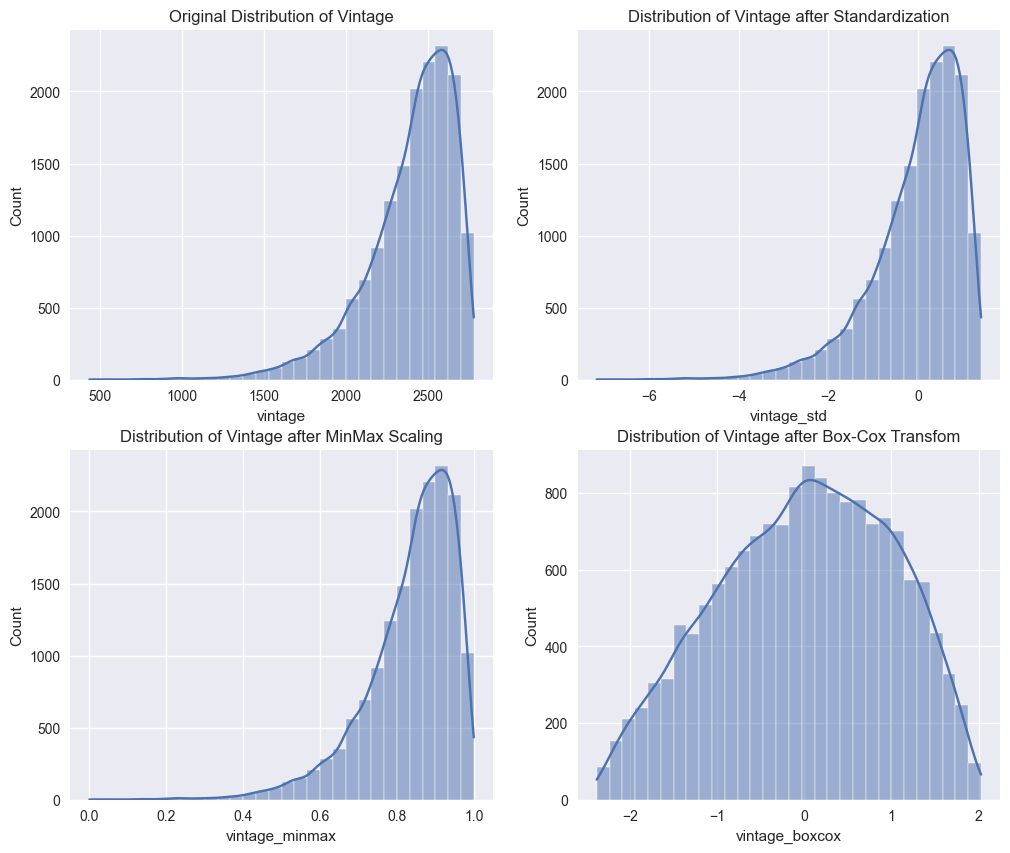

In [112]:
plt.figure(figsize=(12, 10))

plt.subplot(2,2,1)
sns.histplot(df['vintage'], bins=30, kde=True) 
plt.title('Original Distribution of Vintage')

plt.subplot(2,2,2)
sns.histplot(df['vintage_std'], bins=30, kde=True) 
plt.title('Distribution of Vintage after Standardization')

plt.subplot(2,2,3)
sns.histplot(df['vintage_minmax'], bins=30, kde=True) 
plt.title('Distribution of Vintage after MinMax Scaling')

plt.subplot(2,2,4)
sns.histplot(df['vintage_boxcox'], bins=30, kde=True) 
plt.title('Distribution of Vintage after Box-Cox Transfom')


plt.show()

In [114]:
import numpy as np

In [122]:
# df['vintage_log'] = np.log(df['vintage'])
# df['vintage_log'] = np.log10(df['vintage'])

df['vintage_log'] = df['vintage'].apply(np.log)
df['vintage_sqrt'] = df['vintage'].apply(np.sqrt)

df[['vintage', 'vintage_log', 'vintage_sqrt', 'vintage_boxcox']].skew()

vintage          -1.419718
vintage_log      -2.315656
vintage_sqrt     -1.779695
vintage_boxcox   -0.200551
dtype: float64

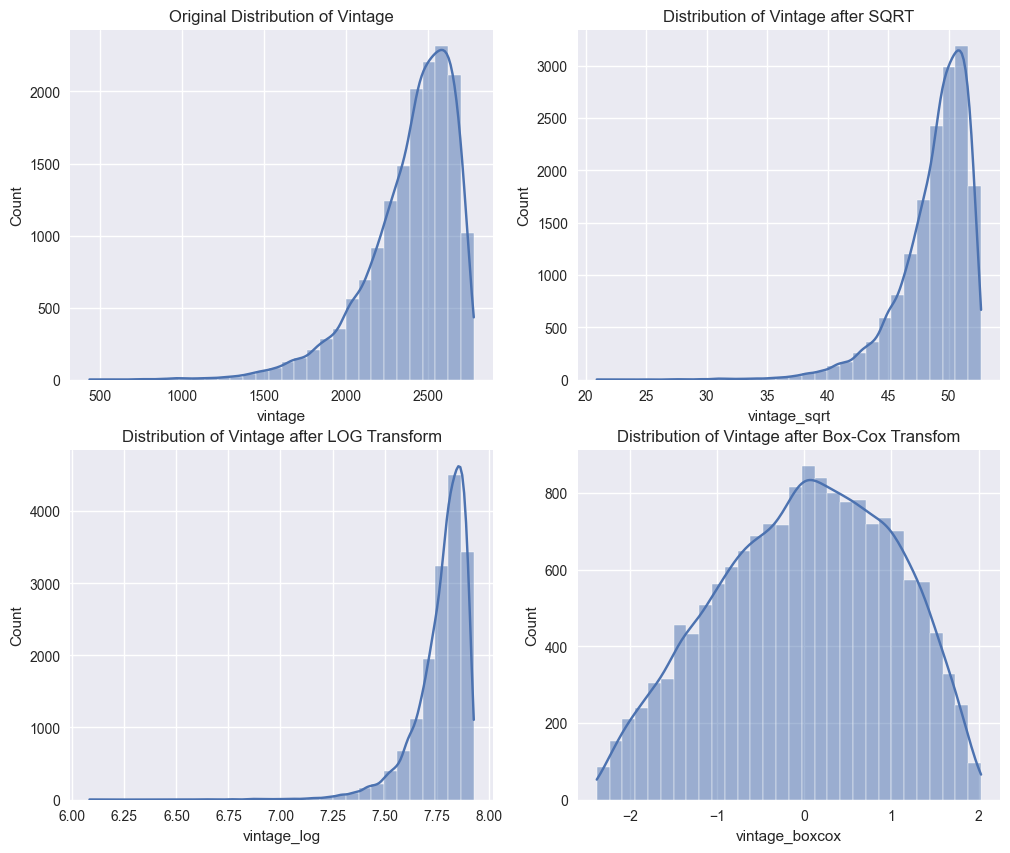

In [123]:
plt.figure(figsize=(12, 10))

plt.subplot(2,2,1)
sns.histplot(df['vintage'], bins=30, kde=True) 
plt.title('Original Distribution of Vintage')

plt.subplot(2,2,2)
sns.histplot(df['vintage_sqrt'], bins=30, kde=True) 
plt.title('Distribution of Vintage after SQRT')

plt.subplot(2,2,3)
sns.histplot(df['vintage_log'], bins=30, kde=True) 
plt.title('Distribution of Vintage after LOG Transform')

plt.subplot(2,2,4)
sns.histplot(df['vintage_boxcox'], bins=30, kde=True) 
plt.title('Distribution of Vintage after Box-Cox Transfom')


plt.show()